## Final Project Submission

Please fill out:
* Student name: Neha Patel
* Student pace: part time
* Scheduled project review date/time: 10/10/2020, 2:30 pm CST
* Instructor name: James Irving
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

## Business Case

Formation Evaluation has played an important role in many industries including but not limited to oil & gas, geothermal, and mining. These industries for long have utilized large and complex data to analyze and make their predictions. This analysis is especially important in the exploration stage of most processes. Till now, certain tools and techniques have been used across various industries to deal with big data. However these processes are cumbersome and is difficult to achieve utmost accuracy while also speeding up the process. 
> This is where the demand of data science rises in hopes of developing a tool/model that can accurately fill in the gaps.

One aspect of Formation evaluation is determining the facies of a certain rock formation based on the log readings measured during the exploration process. Facies determine the properties of that formation, the result of which is important to determine the presence of oil/gas/water, geothermal properties, etc. The most common logs used for facies determination are Gamma Ray, Resistivity, Neutron Density, and photoelectric.
>Different facies show different values for each log measurement.

Thus, analyzing the combined values will help classify each data point at a given depth and thus determine the facies at that depth.
>The final model from this project will help accurately classify each point at a given depth into different facies that would further help to separate the formation into layers and aid the exploration process.

## Methodology

- Exploring the data set: Explore data properties, descripancy, missing data, duplicates, data types, etc.
- Spliting our data into training, testing, and validation sets to avoid bias
- Preprocessing
- Analysis of different models and feature importances
- selecting the best model and explain feature correlations
- Give educated recommendations based off the best model

## Libraries and Functions

In [87]:
# !pip install yellowbrick
# !pip install eli5

In [88]:
# Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomTreesEmbedding,StackingClassifier
from sklearn.svm import SVC
from yellowbrick.classifier import ClassPredictionError,class_prediction_error
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.target import FeatureCorrelation,feature_correlation
from yellowbrick.features import rank1d, rank2d, JointPlotVisualizer,joint_plot
import eli5

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


### Functions

#### Preprocessing

#### Model Selection

#### Model Evaluation

## Exploring Data

In [4]:
#Loading the dataset
df = pd.read_csv('training_data.csv')
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [5]:
#Exploring the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
Facies       3232 non-null int64
Formation    3232 non-null object
Well Name    3232 non-null object
Depth        3232 non-null float64
GR           3232 non-null float64
ILD_log10    3232 non-null float64
DeltaPHI     3232 non-null float64
PHIND        3232 non-null float64
PE           3232 non-null float64
NM_M         3232 non-null int64
RELPOS       3232 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 277.9+ KB


### Nulls
It looks like there are no null values in the dataset. Although, just to be extra sure, we use `df.isna().sum()`

In [7]:
df.isna().sum()

Facies       0
Formation    0
Well Name    0
Depth        0
GR           0
ILD_log10    0
DeltaPHI     0
PHIND        0
PE           0
NM_M         0
RELPOS       0
dtype: int64

### Duplicates

In [8]:
df[df.duplicated()]

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
302,8,B5 LM,SHRIMPLIN,2944.0,234.8,0.515,4.7,11.41,4.8,2,0.4


In [9]:
df[df.duplicated(keep=False)]

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
301,8,B5 LM,SHRIMPLIN,2944.0,234.8,0.515,4.7,11.41,4.8,2,0.4
302,8,B5 LM,SHRIMPLIN,2944.0,234.8,0.515,4.7,11.41,4.8,2,0.4


While one duplicate row wouldn't affect our model, however, we would like to remove it to avoid the slightest possibility of bias.

In [10]:
#Removing the duplicate entry
df.drop_duplicates(inplace = True)

In [11]:
#Check
df.loc[df.index[301:303]]

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
301,8,B5 LM,SHRIMPLIN,2944.0,234.80,0.515,4.7,11.410,4.8,2,0.40
303,8,B5 LM,SHRIMPLIN,2944.5,273.48,0.538,5.3,10.045,5.1,2,0.35


### Evaluating Categorical and Numerical Features

In [12]:
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000
mean,4.420922,2875.803466,66.083567,0.642759,3.559289,13.483855,3.724681,1.498298,0.520325
std,2.503839,131.021059,30.716527,0.241872,5.229719,7.700085,0.896091,0.500074,0.286829
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.914500,0.492500,1.162500,8.343500,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.700000,0.624591,3.500000,12.150000,3.551000,1.000000,0.526000
75%,6.000000,2980.000000,79.625000,0.812823,6.436000,16.457500,4.300000,2.000000,0.767500
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [13]:
#trials for building a function
df.Depth.dtype == 'int64' or df.Depth.dtype == 'float64'

True

In [14]:
def column_type_exploration(df, column):
    
    '''For a given column in the given dataframe, displays an output of number of unique values and
    statistical summary for number type
    -----------------------------------------------
    Input:
    df (DataFrame): DataFrame for the column to evaluate
    column (str): column name
    -----------------------------------------------
    Output:
    statistical summary of the numerical column
    unique value counts'''
    
    if df[column].dtype=='int64' or df[column].dtype=='float64':
        display(df[column].describe())
    
    print('\n')
    print(f'Number of Unique Values: {len(df[column].unique())}')
    print('\n')
    print(f'Example Unique Values: {df[column].unique()[:5]}')
    

In [15]:
#Test the function
column_type_exploration(df,'Depth')

count    3231.000000
mean     2875.803466
std       131.021059
min      2573.500000
25%      2791.000000
50%      2893.500000
75%      2980.000000
max      3122.500000
Name: Depth, dtype: float64



Number of Unique Values: 1099


Example Unique Values: [2793.  2793.5 2794.  2794.5 2795. ]


In [16]:
#exploring all columns
index = 1
for column in df.columns:
    print(f'{index}. {column.upper()}:')
#     print('\n')
    column_type_exploration(df,column)
    print('\n')
    print('--'*40)
    print('\n')
    index+=1

1. FACIES:


count    3231.000000
mean        4.420922
std         2.503839
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: Facies, dtype: float64



Number of Unique Values: 9


Example Unique Values: [3 2 8 6 7]


--------------------------------------------------------------------------------


2. FORMATION:


Number of Unique Values: 14


Example Unique Values: ['A1 SH' 'A1 LM' 'B1 SH' 'B1 LM' 'B2 SH']


--------------------------------------------------------------------------------


3. WELL NAME:


Number of Unique Values: 8


Example Unique Values: ['SHRIMPLIN' 'SHANKLE' 'LUKE G U' 'CROSS H CATTLE' 'NOLAN']


--------------------------------------------------------------------------------


4. DEPTH:


count    3231.000000
mean     2875.803466
std       131.021059
min      2573.500000
25%      2791.000000
50%      2893.500000
75%      2980.000000
max      3122.500000
Name: Depth, dtype: float64



Number of Unique Values: 1099


Example Unique Values: [2793.  2793.5 2794.  2794.5 2795. ]


--------------------------------------------------------------------------------


5. GR:


count    3231.000000
mean       66.083567
std        30.716527
min        13.250000
25%        46.914500
50%        65.700000
75%        79.625000
max       361.150000
Name: GR, dtype: float64



Number of Unique Values: 2776


Example Unique Values: [77.45 78.26 79.05 86.1  74.58]


--------------------------------------------------------------------------------


6. ILD_LOG10:


count    3231.000000
mean        0.642759
std         0.241872
min        -0.025949
25%         0.492500
50%         0.624591
75%         0.812823
max         1.480000
Name: ILD_log10, dtype: float64



Number of Unique Values: 1276


Example Unique Values: [0.664 0.661 0.658 0.655 0.647]


--------------------------------------------------------------------------------


7. DELTAPHI:


count    3231.000000
mean        3.559289
std         5.229719
min       -21.832000
25%         1.162500
50%         3.500000
75%         6.436000
max        18.600000
Name: DeltaPHI, dtype: float64



Number of Unique Values: 1055


Example Unique Values: [ 9.9 14.2 14.8 13.9 13.5]


--------------------------------------------------------------------------------


8. PHIND:


count    3231.000000
mean       13.483855
std         7.700085
min         0.550000
25%         8.343500
50%        12.150000
75%        16.457500
max        84.400000
Name: PHIND, dtype: float64



Number of Unique Values: 1949


Example Unique Values: [11.915 12.565 13.05  13.115 13.3  ]


--------------------------------------------------------------------------------


9. PE:


count    3231.000000
mean        3.724681
std         0.896091
min         0.200000
25%         3.100000
50%         3.551000
75%         4.300000
max         8.094000
Name: PE, dtype: float64



Number of Unique Values: 995


Example Unique Values: [4.6 4.1 3.6 3.5 3.4]


--------------------------------------------------------------------------------


10. NM_M:


count    3231.000000
mean        1.498298
std         0.500074
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: NM_M, dtype: float64



Number of Unique Values: 2


Example Unique Values: [1 2]


--------------------------------------------------------------------------------


11. RELPOS:


count    3231.000000
mean        0.520325
std         0.286829
min         0.010000
25%         0.273000
50%         0.526000
75%         0.767500
max         1.000000
Name: RELPOS, dtype: float64



Number of Unique Values: 825


Example Unique Values: [1.    0.979 0.957 0.936 0.915]


--------------------------------------------------------------------------------




In [17]:
df.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

With Facies being our target variable, we divide the rest of the columns into categorical or numerical type

In [18]:
categorical = ['Formation','Well Name','NM_M']
numerical = ['Depth','GR','ILD_log10','DeltaPHI','PHIND','PE','RELPOS']

#### Exploring Categorical Values

In [19]:
index = 1
for column in categorical:
    print(f'{index}. {column.upper()}:')
    if df[column].dtype == 'object':
        display(df[column].unique())
    else:
        display(df[column].sort_values().unique())
    print('--'*40)
    index+=1

1. FORMATION:


array(['A1 SH', 'A1 LM', 'B1 SH', 'B1 LM', 'B2 SH', 'B2 LM', 'B3 SH',
       'B3 LM', 'B4 SH', 'B4 LM', 'B5 SH', 'B5 LM', 'C SH', 'C LM'],
      dtype=object)

--------------------------------------------------------------------------------
2. WELL NAME:


array(['SHRIMPLIN', 'SHANKLE', 'LUKE G U', 'CROSS H CATTLE', 'NOLAN',
       'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE'], dtype=object)

--------------------------------------------------------------------------------
3. NM_M:


array([1, 2], dtype=int64)

--------------------------------------------------------------------------------


### Exploring Target Variable

In [20]:
df.Facies.sort_values().unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

### Visual Analysis

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\19035\Anaco

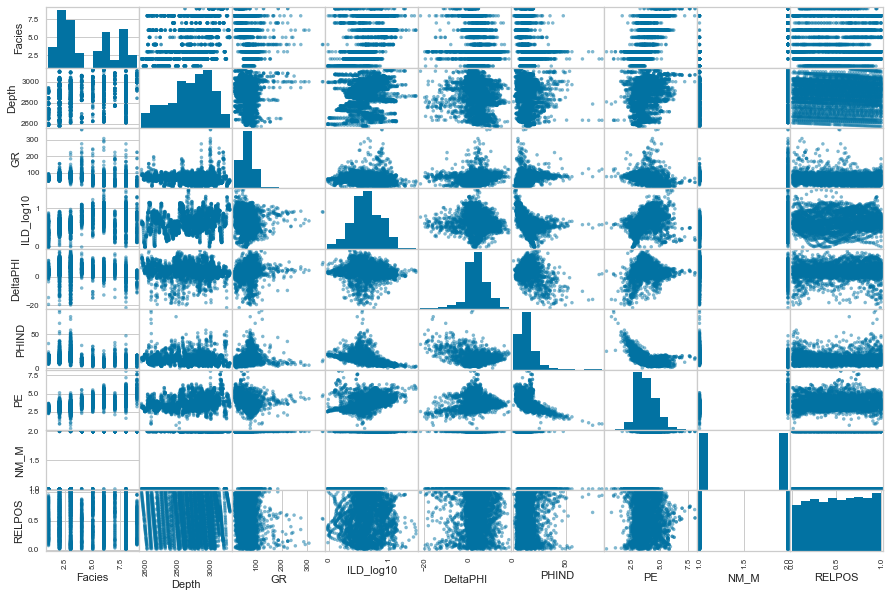

In [21]:
#visualizing a scatter matrix
pd.plotting.scatter_matrix(df,figsize=(15,10));

In [22]:
#Verifying the integer categorical and numerical columns
categorical

['Formation', 'Well Name', 'NM_M']

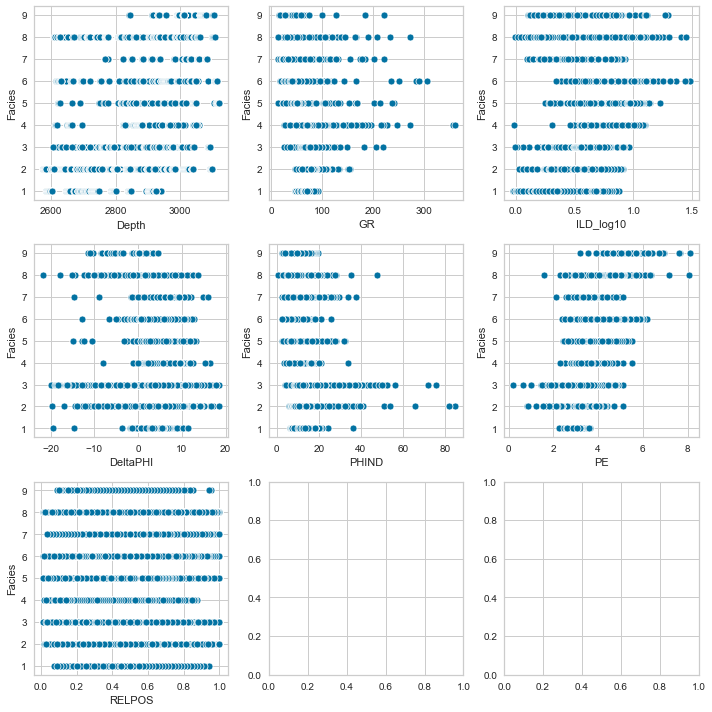

In [23]:
#testing for any basic relation of numerical columns with the target variable
fig,axes = plt.subplots(ncols = 3, nrows = 3, figsize =(10,10))
axes=axes.flatten()
for i,col in enumerate(numerical):
    try:
        sns.scatterplot(x=col, y='Facies', data=df, ax = axes[i],palette='mako')#, palette=color_palette);
    except:
        print(f'{col} - check')
plt.tight_layout()

### Class Imbalance

,Facies
2,22.8412
3,19.0344
8,15.3822
6,14.299
1,8.01609
5,6.71619
4,5.69483
9,4.98298
7,3.03312


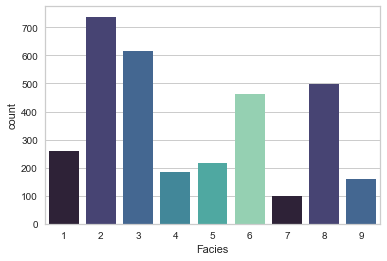

In [24]:
# Detecting class imbalance
color_palette = sns.color_palette("mako")
sns.countplot('Facies', data = df, palette=color_palette);
display((df.Facies.value_counts(normalize = True)*100).to_frame().style.background_gradient())

## Train Test Split

In [25]:
y = df.Facies
X = df.copy().drop('Facies', axis = 1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

### Class Imbalance

,Facies
2,22.7404
3,19.026
8,15.6005
6,14.3211
1,7.67643
5,6.85101
4,5.69542
9,5.03508
7,3.05407


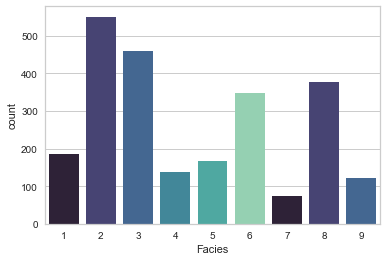

In [27]:
color_palette = sns.color_palette("mako")
sns.countplot(y_train, palette=color_palette);
display((y_train.value_counts(normalize = True)*100).to_frame().style.background_gradient())

## Preprocessing

### Filling The Null Values

Although there aren't any null values in this dataset, there are chances of having some while this model is used at the users end. It is therefore paramount to consider and accommodate for the possible null values.

In [28]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [29]:
num_imputer = KNNImputer(weights='distance') #parameter: copy = True/False?
cat_imputer = KNNImputer(weights='distance')

### Scaling Numerical Columns

Exploring the numerical data to select the best scaler, and then applying the appropriate scaling method.

In [30]:
df[numerical]

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,RELPOS
0,2793.0,77.450,0.664,9.900,11.915,4.600,1.000
1,2793.5,78.260,0.661,14.200,12.565,4.100,0.979
2,2794.0,79.050,0.658,14.800,13.050,3.600,0.957
3,2794.5,86.100,0.655,13.900,13.115,3.500,0.936
4,2795.0,74.580,0.647,13.500,13.300,3.400,0.915
...,...,...,...,...,...,...,...
3227,3120.5,46.719,0.947,1.828,7.254,3.617,0.685
3228,3121.0,44.563,0.953,2.241,8.013,3.344,0.677
3229,3121.5,49.719,0.964,2.925,8.013,3.190,0.669
3230,3122.0,51.469,0.965,3.083,7.708,3.152,0.661


**Visualizations to select scaling method:**

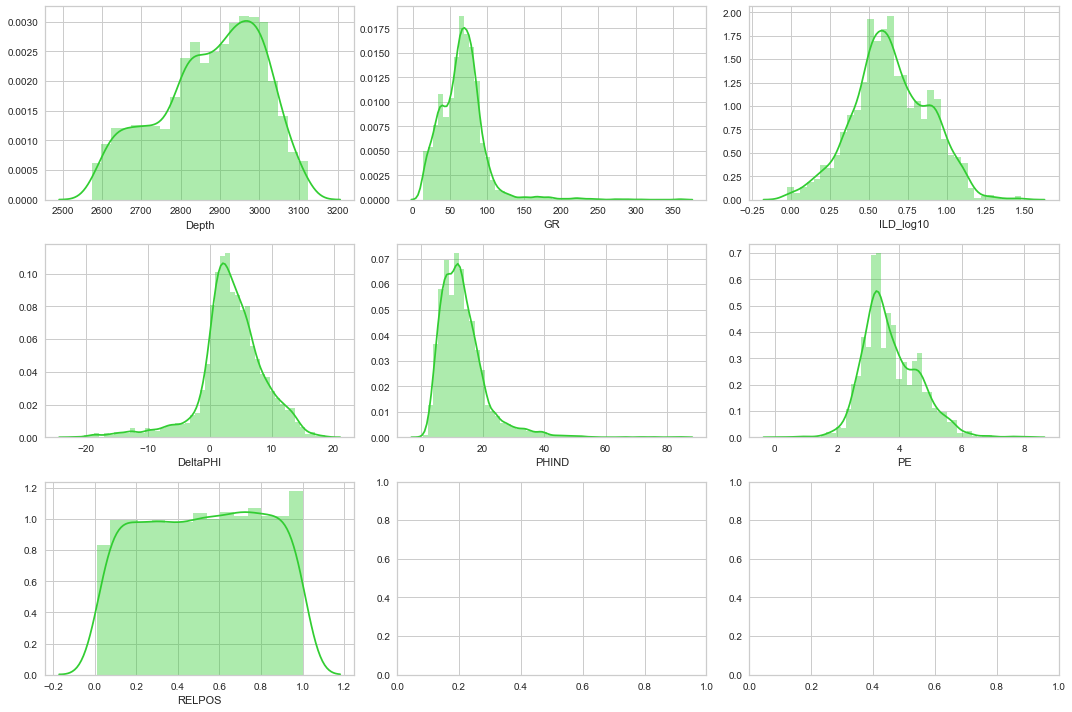

In [31]:
fig,axes = plt.subplots(ncols = 3, nrows = 3, figsize =(15,10))
axes=axes.flatten()
for i,col in enumerate(numerical):
    try:
        sns.distplot(df[col], ax = axes[i], color = '#32CD32');
    except:
        print(f'{col} - check')
plt.tight_layout()

Robust scaler will work for all, .........RELPOS???, quantile transformer/power?

In [32]:
from sklearn.preprocessing import QuantileTransformer

### One Hot Encoding the Categorical Columns

In [33]:
encoder = OneHotEncoder(sparse=False, drop = 'first')

In [34]:
#Test
X_train_ohe_trial = encoder.fit_transform(X_train[categorical])
display(encoder.get_feature_names(categorical))
pd.DataFrame(X_train_ohe_trial, columns=encoder.get_feature_names(categorical))

array(['Formation_A1 SH', 'Formation_B1 LM', 'Formation_B1 SH',
       'Formation_B2 LM', 'Formation_B2 SH', 'Formation_B3 LM',
       'Formation_B3 SH', 'Formation_B4 LM', 'Formation_B4 SH',
       'Formation_B5 LM', 'Formation_B5 SH', 'Formation_C LM',
       'Formation_C SH', 'Well Name_CROSS H CATTLE', 'Well Name_LUKE G U',
       'Well Name_NEWBY', 'Well Name_NOLAN', 'Well Name_Recruit F9',
       'Well Name_SHANKLE', 'Well Name_SHRIMPLIN', 'NM_M_2'], dtype=object)

,Formation_A1 SH,Formation_B1 LM,Formation_B1 SH,Formation_B2 LM,Formation_B2 SH,Formation_B3 LM,Formation_B3 SH,Formation_B4 LM,Formation_B4 SH,Formation_B5 LM,...,Formation_C LM,Formation_C SH,Well Name_CROSS H CATTLE,Well Name_LUKE G U,Well Name_NEWBY,Well Name_NOLAN,Well Name_Recruit F9,Well Name_SHANKLE,Well Name_SHRIMPLIN,NM_M_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Pipelines

In [35]:
set_config(display='diagram')

#### Preprocessing

In [36]:
cat_transformer = Pipeline(steps=[('impute', KNNImputer(weights='distance')),
                                  ('ohe', OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'))])

In [37]:
num_transformer = Pipeline(steps=[('impute', KNNImputer(weights='distance')),
                                  ('scaler', RobustScaler())])

In [38]:
preprocessing = ColumnTransformer(transformers=[('num', num_transformer,numerical),
                                                ('cat', cat_transformer,categorical)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  KNNImputer(weights='distance')),
                                                 ('scaler', RobustScaler())]),
                                 ['Depth', 'GR', 'ILD_log10', 'DeltaPHI',
                                  'PHIND', 'PE', 'RELPOS']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  KNNImputer(weights='distance')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Formation', 'Well Name', 'NM_M'])])

In [39]:
def preprocessing(num_cols, cat_cols,
                  cat_imputer=KNNImputer(weights='distance'), 
                  encoder=OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore'), 
                  num_imputer=KNNImputer(weights='distance'), 
                  transformation=PowerTransformer()):
    
    '''Builds a preprocessing pipeline and column transformation to data containing numerical and/or categorical data 
    based on the chosen classes/preprocessing methods
    --------------------------------
    Inputs:
    
    cat_imputer (class): Imputer class for categorical data. Default - KNNImputer() with weights as distance
    encoder (class): encoding class for categorical data. Default - OneHotEncoder() ignoring the unknowns and dropping first
    num_imputer (class): Imputer class for numerical data. Default - KNNImputer() with weights as distance
    transformation (class): linear scaling or non-linear transformation class. Default - PowerTransformer()
    num_cols (list): numerical columns
    cat_cols (list): categorical columns
    --------------------------------
    Output:
    
    ColumnTransformer pipeline to preprocess a given data
    --------------------------------'''
    
    cat_transformer = Pipeline(steps=[('impute', cat_imputer),
                                  ('ohe', encoder)])
    
    num_transformer = Pipeline(steps=[('impute', num_imputer),
                                  ('scaler', transformation)])
    
    preprocessing = ColumnTransformer(transformers=[('num', num_transformer,num_cols),
                                                ('cat', cat_transformer,cat_cols)])
    return preprocessing

In [40]:
preprocessing(numerical, categorical, transformation=RobustScaler())

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  KNNImputer(weights='distance')),
                                                 ('scaler', RobustScaler())]),
                                 ['Depth', 'GR', 'ILD_log10', 'DeltaPHI',
                                  'PHIND', 'PE', 'RELPOS']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  KNNImputer(weights='distance')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Formation', 'Well Name', 'NM_M'])])

In [41]:
def preprocessing_trial(num_cols, cat_cols,
                  cat_imputer=KNNImputer(weights='distance'), 
                  encoder=OneHotEncoder(sparse=False, drop='first',handle_unknown='error'), 
                  num_imputer=KNNImputer(weights='distance'), 
                  transformation=PowerTransformer()):
    
    '''Builds a preprocessing pipeline and column transformation to data containing numerical and/or categorical data 
    based on the chosen classes/preprocessing methods
    --------------------------------
    Inputs:
    
    cat_imputer (class): Imputer class for categorical data. Default - KNNImputer() with weights as distance
    encoder (class): encoding class for categorical data. Default - OneHotEncoder() ignoring the unknowns and dropping first
    num_imputer (class): Imputer class for numerical data. Default - KNNImputer() with weights as distance
    transformation (class): linear scaling or non-linear transformation class. Default - PowerTransformer()
    num_cols (list): numerical columns
    cat_cols (list): categorical columns
    --------------------------------
    Output:
    
    ColumnTransformer pipeline to preprocess a given data
    --------------------------------'''
    
    cat_transformer = Pipeline(steps=[('ohe', encoder),
                                      ('impute', cat_imputer)])
    
    num_transformer = Pipeline(steps=[('impute', num_imputer),
                                  ('scaler', transformation)])
    
    preprocessing = ColumnTransformer(transformers=[('num', num_transformer,num_cols),
                                                ('cat', cat_transformer,cat_cols)])
    return preprocessing

#### Modeling

In [42]:
def model_pipeline(model,preprocessor):
    model = Pipeline(steps = [('preprocessor', preprocessor),
                              ('model', model)])
    return model

In [43]:
model_pipeline(KNeighborsRegressor(),preprocessing(numerical, categorical, transformation=RobustScaler()))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(weights='distance')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Depth', 'GR', 'ILD_log10',
                                                   'DeltaPHI', 'PHIND', 'PE',
                                                   'RELPOS']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(weights='distance')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Formation', 'Well Name',
                                                   'NM_M'])])),
                ('model', KNeighborsRegressor())])

## Train Validation Split

In [44]:
X_train_model, X_validation, y_train_model, y_validation = train_test_split(X_train, y_train, random_state = 7)

## Base Model - KNN

Since the nature of the dataset is such that most of the immediate data points in depth have the same characteristics, except on the boundaries, our best first approach could be using the KNN model.

In [45]:
# # Initiate model
# knn_model = model_pipeline(KNeighborsClassifier(weights='distance'),
#                            preprocessing(numerical,categorical, transformation=RobustScaler()))

# #Fit model
# knn_model.fit(X_train_model,y_train_model)

In [46]:
# model_pipeline(KNeighborsClassifier(weights='distance'),
#                            preprocessing(numerical,categorical, transformation=RobustScaler()))

In [47]:
# Initiate model
knn_model_trial = model_pipeline(KNeighborsClassifier(weights='distance'),
                           preprocessing_trial(numerical,categorical, transformation=RobustScaler()))

#Fit model
knn_model_trial.fit(X_train_model,y_train_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(weights='distance')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Depth', 'GR', 'ILD_log10',
                                                   'DeltaPHI', 'PHIND', 'PE',
                                                   'RELPOS']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('impute',
                                                                   KNNImputer(weights='distance'))]),
                                                  ['Formation', 'Well Name',
                                                   'NM_M'])])),
                ('model', KNeighborsClassifier(weights='distance'))])

In [48]:
#Predict
y_hat_knn_trial = knn_model_trial.predict(X_validation)

In [49]:
print(metrics.classification_report(y_validation, y_hat_knn_trial))
#output_dict = True

              precision    recall  f1-score   support

           1       0.84      0.88      0.86        42
           2       0.85      0.83      0.84       150
           3       0.75      0.77      0.76       115
           4       0.63      0.76      0.69        34
           5       0.77      0.75      0.76        36
           6       0.75      0.75      0.75        79
           7       0.79      0.73      0.76        15
           8       0.85      0.78      0.81       105
           9       0.94      0.97      0.95        30

    accuracy                           0.80       606
   macro avg       0.80      0.80      0.80       606
weighted avg       0.80      0.80      0.80       606



In [50]:
#Evaluation Report

In [51]:
class formating:
    underline = '\033[4m'
    bold = '\033[1m'
    italics = '\033[3m'
    cyan = '\033[36m'
    blue = '\033[34m'
    green = '\033[32m'
    normal = '\033[0m'

In [52]:
def model_evaluation(model,X,y,cm_normalize = 'true', cm_cmap = 'BuGn_r' ):
    '''Displays classification matrix and visual evaluation (confusion matrix) for a given scikit learn model
    for test data
    ------------------------------
    Inputs:
    
    model (sklearn model)
    X (DataFrame, series or array): test data for features
    y (series or array): dependent variable
    ------------------------------
    
    Outputs:
    
    sklearn confusion matrix (DataFrame)
    sklearn confusion matrix plot
    ------------------------------'''
    
    print('\n')
    print(formating.bold + formating.underline+ formating.blue + 'MODEL EVALUATION' + formating.normal)
    print('\n')
    
    #classification report
    
    print(formating.bold + formating.underline + 'Classification Report' + formating.normal)
#     print('\n')
    
    y_hat = model.predict(X)
    display(pd.DataFrame(metrics.classification_report(y,y_hat,output_dict=True)))
    
    
    #Visual Separation
    
    print('\n')
    print('--'*20)
    print('\n')
    
    
    #Visual Evaluation
    
    print(formating.bold + formating.underline + 'Visual Evaluation' + formating.normal)
#     print('\n')
    
    fig,axes = plt.subplots(figsize = (10,10))
#     axes = axes.flatten()
    
    metrics.plot_confusion_matrix(model,X,y,normalize = cm_normalize, cmap = cm_cmap,ax=axes)#, ax=axes[0])
    axes.set_title('Confusion Matrix')
    
#     metrics.plot_roc_curve(model, X,y, ax=axes[1])
#     axes[1].set_title('ROC Curve')
#     axes[1].legend()
#     axes[1].plot([0,1],[0,1], ls = ':')
    
    fig.tight_layout()
#     plt.show()



MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.840909,0.849315,0.747899,0.634146,0.771429,0.746835,0.785714,0.845361,0.935484,0.79868,0.795233,0.801435
recall,0.880952,0.826667,0.773913,0.764706,0.750000,0.746835,0.733333,0.780952,0.966667,0.79868,0.802670,0.798680
f1-score,0.860465,0.837838,0.760684,0.693333,0.760563,0.746835,0.758621,0.811881,0.950820,0.79868,0.797893,0.799338
support,42.000000,150.000000,115.000000,34.000000,36.000000,79.000000,15.000000,105.000000,30.000000,0.79868,606.000000,606.000000




----------------------------------------


Visual Evaluation


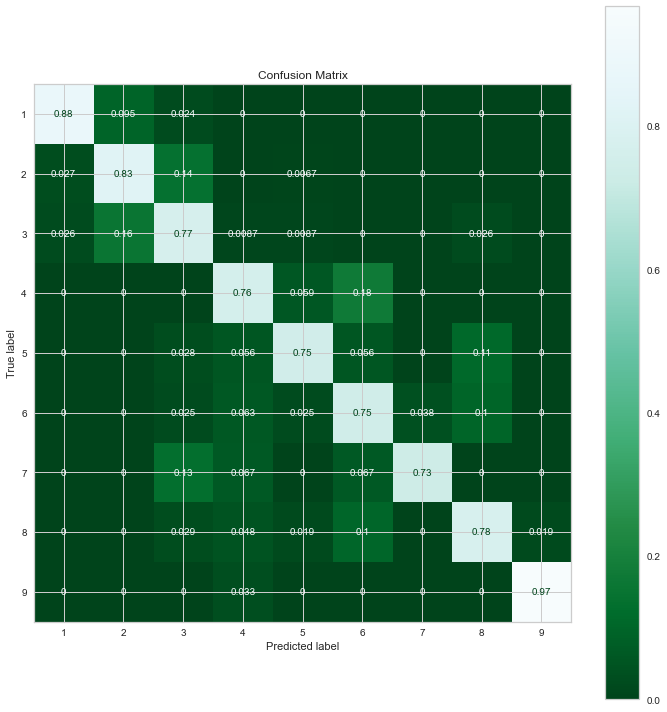

In [53]:
knn_model = knn_model_trial.fit(X_train_model,y_train_model)
model_evaluation(knn_model,X_validation,y_validation,cm_cmap = 'BuGn_r')

### GridSearchCV

In [54]:
parameter = {'model__n_neighbors': [5,10,15,20],
             'model__weights': ['uniform','distance']}
cv = GridSearchCV(knn_model,param_grid = parameter, scoring = 'f1_macro')
cv.fit(X_train_model,y_train_model)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          KNNImputer(weights='distance')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Depth',
                                                                          'GR',
                                                                          'ILD_log10',
                                                                          'DeltaPHI',
                                                                          'PHIND',
                                                                          'PE',
                                                                          'RELPOS']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('impute',
                                                                                          KNNImputer(weights='distance'))]),
                                                                         ['Formation',
                                                                          'Well '
                                                                          'Name',
                                                                          'NM_M'])])),
                                       ('model',
                                        KNeighborsClassifier(weights='distance'))]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20],
                         'model__weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [55]:
cv.best_params_

{'model__n_neighbors': 5, 'model__weights': 'distance'}

In [56]:
parameter = {'model__n_neighbors': [2,3,4,5],
             'model__weights': ['uniform','distance']}
cv = GridSearchCV(knn_model,param_grid = parameter,scoring = 'f1_macro')
cv.fit(X_train_model,y_train_model)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          KNNImputer(weights='distance')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Depth',
                                                                          'GR',
                                                                          'ILD_log10',
                                                                          'DeltaPHI',
                                                                          'PHIND',
                                                                          'PE',
                                                                          'RELPOS']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('impute',
                                                                                          KNNImputer(weights='distance'))]),
                                                                         ['Formation',
                                                                          'Well '
                                                                          'Name',
                                                                          'NM_M'])])),
                                       ('model',
                                        KNeighborsClassifier(weights='distance'))]),
             param_grid={'model__n_neighbors': [2, 3, 4, 5],
                         'model__weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [57]:
cv.best_params_

{'model__n_neighbors': 2, 'model__weights': 'distance'}



MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.875000,0.863946,0.798319,0.625000,0.763158,0.766234,0.857143,0.831683,0.966667,0.816832,0.816350,0.819453
recall,0.833333,0.846667,0.826087,0.735294,0.805556,0.746835,0.800000,0.800000,0.966667,0.816832,0.817827,0.816832
f1-score,0.853659,0.855219,0.811966,0.675676,0.783784,0.756410,0.827586,0.815534,0.966667,0.816832,0.816278,0.817662
support,42.000000,150.000000,115.000000,34.000000,36.000000,79.000000,15.000000,105.000000,30.000000,0.816832,606.000000,606.000000




----------------------------------------


Visual Evaluation


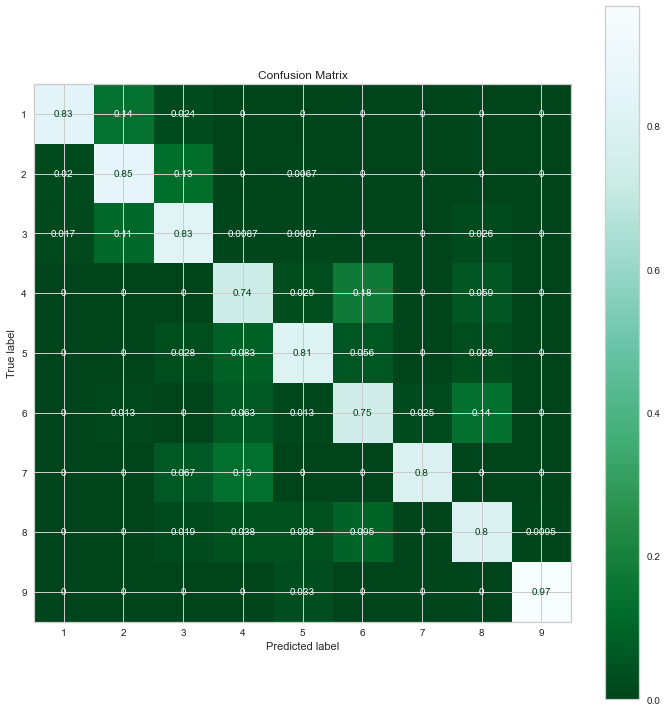

In [58]:
model_evaluation(cv.best_estimator_,X_validation,y_validation,cm_cmap = 'BuGn_r')

### Effect of Transformers

#### QuantileTransformer

In [59]:
model2_pipeline = model_pipeline(KNeighborsClassifier(weights='distance'),
                           preprocessing_trial(numerical,categorical, transformation=QuantileTransformer(random_state = 7)))
model_2 = model2_pipeline.fit(X_train_model,y_train_model)
parameter = {'model__n_neighbors': [5,10,15,20],
             'model__weights': ['uniform','distance'],
            'preprocessor__num__impute__weights' : ['uniform','distance']}
cv2 = GridSearchCV(model_2,param_grid = parameter, scoring = 'f1_macro')
cv2.fit(X_train_model,y_train_model)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          KNNImputer(weights='distance')),
                                                                                         ('scaler',
                                                                                          QuantileTransformer(random_state=7))]),
                                                                         ['Depth',
                                                                          'GR',
                                                                          'ILD_log10',
                                                                          'DeltaPHI',
                                                                          'PHIND',
                                                                          'PE',
                                                                          'RELPOS']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('impute',
                                                                                          KNNImputer(weights='distance'))]),
                                                                         ['Formation',
                                                                          'Well '
                                                                          'Name',
                                                                          'NM_M'])])),
                                       ('model',
                                        KNeighborsClassifier(weights='distance'))]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20],
                         'model__weights': ['uniform', 'distance'],
                         'preprocessor__num__impute__weights': ['uniform',
                                                                'distance']},
             scoring='f1_macro')

In [60]:
cv2.best_params_

{'model__n_neighbors': 5,
 'model__weights': 'distance',
 'preprocessor__num__impute__weights': 'uniform'}

In [61]:
model2_pipeline = model_pipeline(KNeighborsClassifier(weights='distance'),
                           preprocessing_trial(numerical,categorical, transformation=QuantileTransformer(random_state = 7)))
model_2 = model2_pipeline.fit(X_train_model,y_train_model)
parameter = {'model__n_neighbors': [2,3,4,5],
             'model__weights': ['uniform','distance'],
            'preprocessor__num__impute__weights' : ['uniform','distance']}
cv2 = GridSearchCV(model_2,param_grid = parameter,scoring = 'f1_macro')
cv2.fit(X_train_model,y_train_model)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          KNNImputer(weights='distance')),
                                                                                         ('scaler',
                                                                                          QuantileTransformer(random_state=7))]),
                                                                         ['Depth',
                                                                          'GR',
                                                                          'ILD_log10',
                                                                          'DeltaPHI',
                                                                          'PHIND',
                                                                          'PE',
                                                                          'RELPOS']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('impute',
                                                                                          KNNImputer(weights='distance'))]),
                                                                         ['Formation',
                                                                          'Well '
                                                                          'Name',
                                                                          'NM_M'])])),
                                       ('model',
                                        KNeighborsClassifier(weights='distance'))]),
             param_grid={'model__n_neighbors': [2, 3, 4, 5],
                         'model__weights': ['uniform', 'distance'],
                         'preprocessor__num__impute__weights': ['uniform',
                                                                'distance']},
             scoring='f1_macro')

In [62]:
cv2.best_params_

{'model__n_neighbors': 2,
 'model__weights': 'distance',
 'preprocessor__num__impute__weights': 'uniform'}



MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.875000,0.863946,0.798319,0.625000,0.763158,0.766234,0.857143,0.831683,0.966667,0.816832,0.816350,0.819453
recall,0.833333,0.846667,0.826087,0.735294,0.805556,0.746835,0.800000,0.800000,0.966667,0.816832,0.817827,0.816832
f1-score,0.853659,0.855219,0.811966,0.675676,0.783784,0.756410,0.827586,0.815534,0.966667,0.816832,0.816278,0.817662
support,42.000000,150.000000,115.000000,34.000000,36.000000,79.000000,15.000000,105.000000,30.000000,0.816832,606.000000,606.000000




----------------------------------------


Visual Evaluation


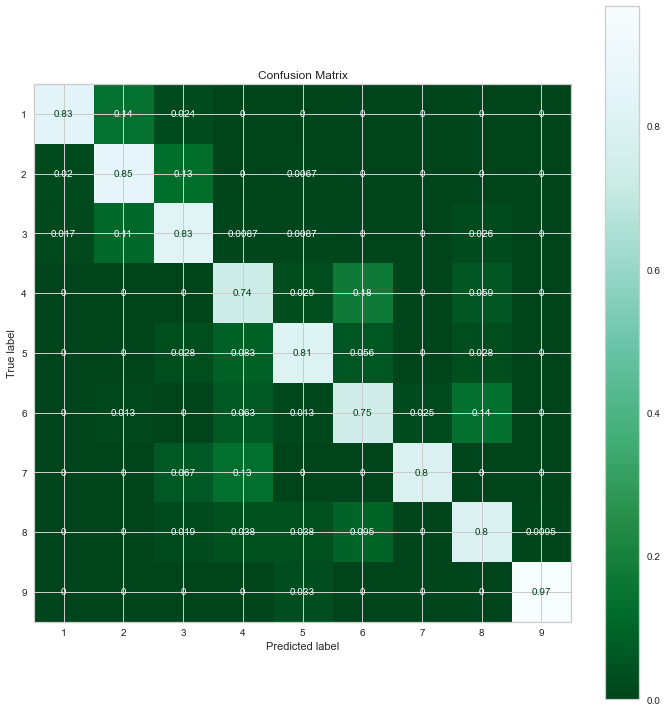

In [63]:
model_evaluation(cv.best_estimator_,X_validation,y_validation,cm_cmap = 'BuGn_r')

#### PowerTransformer

In [64]:
model3_pipeline = model_pipeline(KNeighborsClassifier(weights='distance'),
                           preprocessing_trial(numerical,categorical, transformation=PowerTransformer()))
model_3 = model3_pipeline.fit(X_train_model,y_train_model)
parameter = {'model__n_neighbors': [2,3,4,5],
             'model__weights': ['uniform','distance'],
            'preprocessor__num__impute__weights' : ['uniform','distance']}
cv3 = GridSearchCV(model_3,param_grid = parameter, scoring = 'f1_macro')
cv3.fit(X_train_model,y_train_model)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          KNNImputer(weights='distance')),
                                                                                         ('scaler',
                                                                                          PowerTransformer())]),
                                                                         ['Depth',
                                                                          'GR',
                                                                          'ILD_log10',
                                                                          'DeltaPHI',
                                                                          'PHIND',
                                                                          'PE',
                                                                          'RELPOS']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('impute',
                                                                                          KNNImputer(weights='distance'))]),
                                                                         ['Formation',
                                                                          'Well '
                                                                          'Name',
                                                                          'NM_M'])])),
                                       ('model',
                                        KNeighborsClassifier(weights='distance'))]),
             param_grid={'model__n_neighbors': [2, 3, 4, 5],
                         'model__weights': ['uniform', 'distance'],
                         'preprocessor__num__impute__weights': ['uniform',
                                                                'distance']},
             scoring='f1_macro')

In [65]:
cv3.best_params_

{'model__n_neighbors': 2,
 'model__weights': 'distance',
 'preprocessor__num__impute__weights': 'uniform'}



MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.875000,0.851351,0.796610,0.615385,0.743590,0.775000,0.857143,0.857143,0.966667,0.816832,0.815321,0.819864
recall,0.833333,0.840000,0.817391,0.705882,0.805556,0.784810,0.800000,0.800000,0.966667,0.816832,0.817071,0.816832
f1-score,0.853659,0.845638,0.806867,0.657534,0.773333,0.779874,0.827586,0.827586,0.966667,0.816832,0.815416,0.817831
support,42.000000,150.000000,115.000000,34.000000,36.000000,79.000000,15.000000,105.000000,30.000000,0.816832,606.000000,606.000000




----------------------------------------


Visual Evaluation


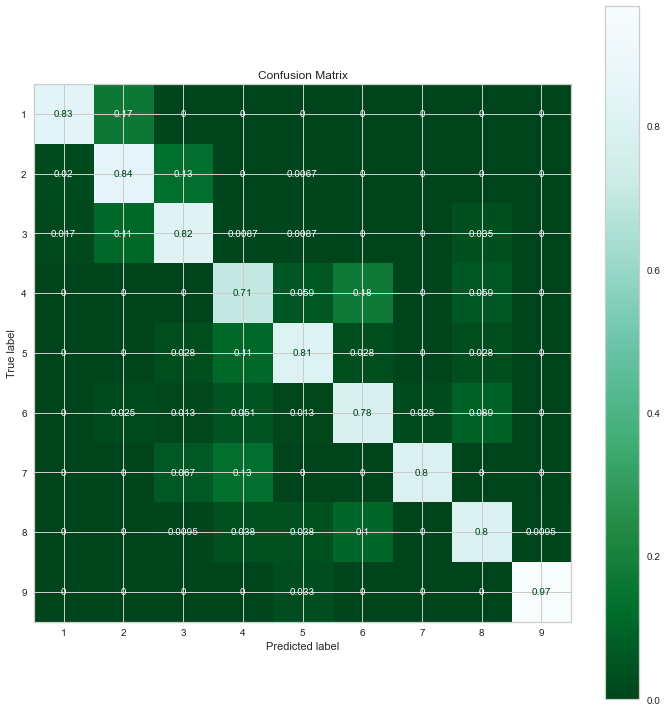

In [66]:
model_evaluation(cv3.best_estimator_, X_validation, y_validation)

### Visualization and Best Estimator Selection

#### Best Estimator

In [67]:
y_hat_trial = cv.best_estimator_.predict(X_validation)
report = pd.DataFrame(metrics.classification_report(y_validation,y_hat_trial, output_dict=True))
report.loc['f1-score']

1               0.853659
2               0.855219
3               0.811966
4               0.675676
5               0.783784
6               0.756410
7               0.827586
8               0.815534
9               0.966667
accuracy        0.816832
macro avg       0.816278
weighted avg    0.817662
Name: f1-score, dtype: float64

In [68]:
models = [cv,cv2,cv3]
description = ['RobustScaler','QuantileTransformer','PowerTransformer']
scores = {}
for i in range(len(models)):
    y_hat_trial = models[i].best_estimator_.predict(X_validation)
    report = pd.DataFrame(metrics.classification_report(y_validation,y_hat_trial, output_dict=True))
    scores[description[i]] = report.loc['f1-score']
scores

{'RobustScaler': 1               0.853659
 2               0.855219
 3               0.811966
 4               0.675676
 5               0.783784
 6               0.756410
 7               0.827586
 8               0.815534
 9               0.966667
 accuracy        0.816832
 macro avg       0.816278
 weighted avg    0.817662
 Name: f1-score, dtype: float64,
 'QuantileTransformer': 1               0.867470
 2               0.865772
 3               0.843478
 4               0.695652
 5               0.743590
 6               0.738854
 7               0.800000
 8               0.836538
 9               0.949153
 accuracy        0.825083
 macro avg       0.815612
 weighted avg    0.825745
 Name: f1-score, dtype: float64,
 'PowerTransformer': 1               0.853659
 2               0.845638
 3               0.806867
 4               0.657534
 5               0.773333
 6               0.779874
 7               0.827586
 8               0.827586
 9               0.966667
 accuracy        

In [69]:
f1_table = pd.DataFrame(scores).reset_index()
f1_table = f1_table.rename(columns = {'index':'Formation'})
f1_table_formation = f1_table.loc[:8]
f1_table_formation

,Formation,RobustScaler,QuantileTransformer,PowerTransformer
0,1,0.853659,0.867470,0.853659
1,2,0.855219,0.865772,0.845638
2,3,0.811966,0.843478,0.806867
3,4,0.675676,0.695652,0.657534
4,5,0.783784,0.743590,0.773333
5,6,0.756410,0.738854,0.779874
6,7,0.827586,0.800000,0.827586
7,8,0.815534,0.836538,0.827586
8,9,0.966667,0.949153,0.966667


In [70]:
table = pd.melt(f1_table_formation, id_vars=['Formation'],value_name='f1_score', var_name = 'Scaler/Transformer')

<AxesSubplot:xlabel='Formation', ylabel='f1_score'>

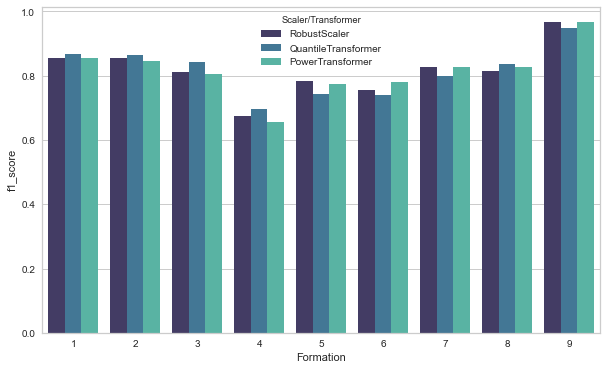

In [71]:
fig,axes = plt.subplots(figsize = (10,6))
sns.barplot('Formation', 'f1_score', hue = 'Scaler/Transformer', data = table, palette='mako', ax=axes)

In [72]:
f1_table_formation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
Formation              9 non-null object
RobustScaler           9 non-null float64
QuantileTransformer    9 non-null float64
PowerTransformer       9 non-null float64
dtypes: float64(3), object(1)
memory usage: 416.0+ bytes


In [73]:
f1_table_formation['Formation']=f1_table_formation['Formation'].astype('float64')
f1_table_formation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
Formation              9 non-null float64
RobustScaler           9 non-null float64
QuantileTransformer    9 non-null float64
PowerTransformer       9 non-null float64
dtypes: float64(4)
memory usage: 416.0 bytes


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
f1_table_formation.columns[1:][1]

'QuantileTransformer'

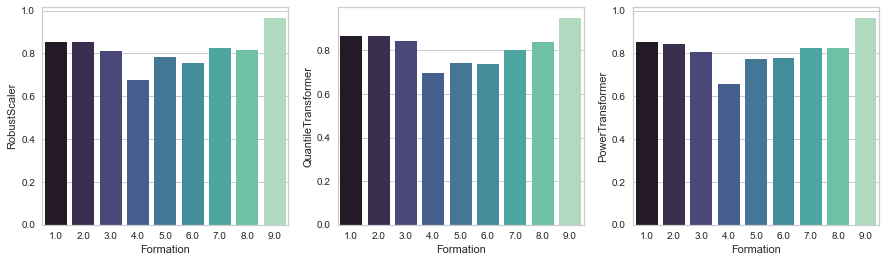

In [75]:
fig,axes = plt.subplots(ncols=3, figsize = (15,4))
columns = f1_table_formation.columns[1:]
for i in range(len(columns)):
    sns.barplot(y=columns[i],x='Formation', data=f1_table_formation, ax = axes[i], palette='mako')

In [76]:
metrics.f1_score(y_validation,y_hat_trial,average='macro')

0.815415994163623

In [77]:
models = [cv,cv2,cv3]
description = ['RobustScaler','QuantileTransformer','PowerTransformer']
f1_macro = []
for i in range(len(models)):
    y_hat_trial = models[i].best_estimator_.predict(X_validation)
    f1 = round(metrics.f1_score(y_validation,y_hat_trial,average='macro'),5)
    f1_macro.append(f1)
f1_macro

[0.81628, 0.81561, 0.81542]

##### Therefore the KNN estimator is `cv`: Final Model - `final_KNN` 

In [78]:
cv.best_params_

{'model__n_neighbors': 2, 'model__weights': 'distance'}

In [79]:
final_KNN = cv.best_estimator_

#### Model Evaluation

In [80]:
#Feature Importances

In [81]:
#yellowbrick visualizations

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


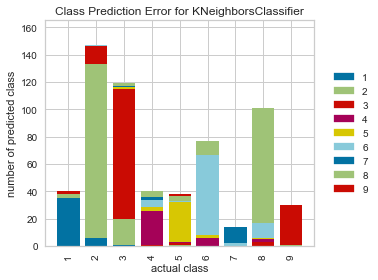

In [82]:
#Class Prediction Error 1
visualizer = ClassPredictionError(final_KNN)
visualizer.fit(X_train_model,y_train_model)
visualizer.score(X_validation,y_validation)
visualizer.show();

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


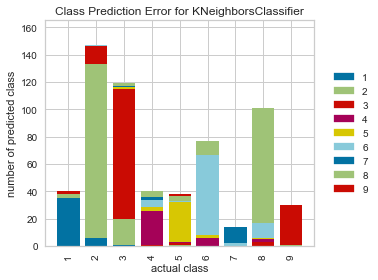

In [83]:
#Class Prediction Error 2
class_prediction_error(final_KNN,X_train_model, y_train_model, X_validation, y_validation);

In [84]:
# #Feature Importances
# X_train_feature = preprocessing_trial(numerical,categorical).fit_transform(X_train_model)
# visual = FeatureImportances(KNeighborsClassifier(cv.best_params_).fit(X_train_feature,y_train_model)) #relative importances
# visual.fit(X_train_feature,y_train_model)
# visual.show()

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


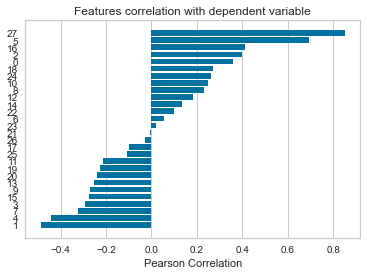

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [85]:
#Feature Correlation with target variable
visualize = FeatureCorrelation(sort = True)
X_train_feature = preprocessing_trial(numerical,categorical).fit_transform(X_train_model)
visualize.fit(X_train_feature,y_train_model)
visualize.show()

In [89]:
X_train_feature_j = preprocessing_trial(numerical,categorical).fit(X_train_model)
cat_cols_j = X_train_feature_j.named_transformers_['cat'].named_steps['ohe'].get_feature_names()
cols_j = numerical+list(cat_cols_j)
cols_j

['Depth',
 'GR',
 'ILD_log10',
 'DeltaPHI',
 'PHIND',
 'PE',
 'RELPOS',
 'x0_A1 SH',
 'x0_B1 LM',
 'x0_B1 SH',
 'x0_B2 LM',
 'x0_B2 SH',
 'x0_B3 LM',
 'x0_B3 SH',
 'x0_B4 LM',
 'x0_B4 SH',
 'x0_B5 LM',
 'x0_B5 SH',
 'x0_C LM',
 'x0_C SH',
 'x1_CROSS H CATTLE',
 'x1_LUKE G U',
 'x1_NEWBY',
 'x1_NOLAN',
 'x1_Recruit F9',
 'x1_SHANKLE',
 'x1_SHRIMPLIN',
 'x2_2']

In [92]:
X_train_feature_j_df = preprocessing_trial(numerical,categorical).fit_transform(X_train_model)
X_train_feature_j_df = pd.DataFrame(X_train_feature_j_df,columns = cols_j)
X_train_feature_j_df.columns

Index(['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'RELPOS',
       'x0_A1 SH', 'x0_B1 LM', 'x0_B1 SH', 'x0_B2 LM', 'x0_B2 SH', 'x0_B3 LM',
       'x0_B3 SH', 'x0_B4 LM', 'x0_B4 SH', 'x0_B5 LM', 'x0_B5 SH', 'x0_C LM',
       'x0_C SH', 'x1_CROSS H CATTLE', 'x1_LUKE G U', 'x1_NEWBY', 'x1_NOLAN',
       'x1_Recruit F9', 'x1_SHANKLE', 'x1_SHRIMPLIN', 'x2_2'],
      dtype='object')

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


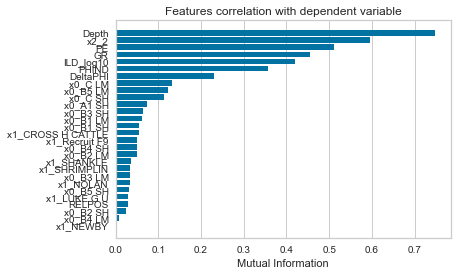

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [90]:
#Feature Correlation with target variable - mutual information
visualize = FeatureCorrelation(method='mutual_info-classification',sort = True,labels=cols_j)
X_train_feature = preprocessing_trial(numerical,categorical).fit_transform(X_train_model)
visualize.fit(X_train_feature,y_train_model)
visualize.show()

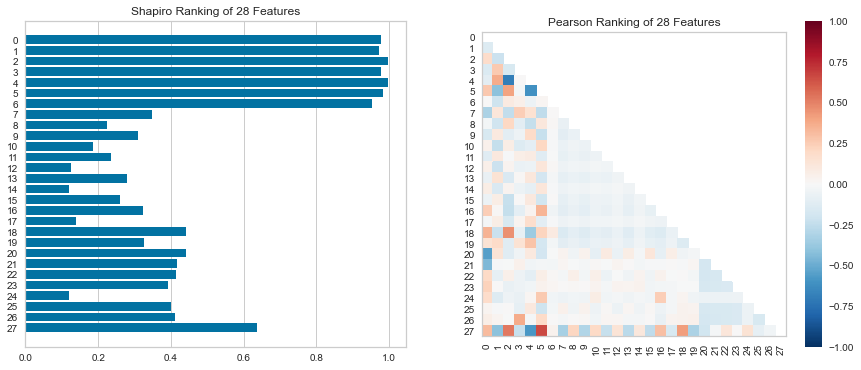

In [91]:
#Rank Features 1d and 2d
fig,axes = plt.subplots(ncols=2, figsize=(15,6))
rank1d(X_train_feature, ax=axes[0], show=False)
rank2d(X_train_feature, ax=axes[1], show=False)
plt.show()

In [93]:
# # Joint Plot Visualizer
# for column in X_train_feature_j_df.columns:
#     vis = joint_plot(X_train_feature[column], y_train_model)

In [104]:
final_KNN.named_steps['model']

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [105]:
eli5.explain_weights(final_KNN.named_steps['model'])

Explanation(estimator="KNeighborsClassifier(n_neighbors=2, weights='distance')", description=None, error="estimator KNeighborsClassifier(n_neighbors=2, weights='distance') is not supported", method=None, is_regression=False, targets=None, feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [147]:
# final_KNN.named_steps['model'].feature_importances_

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


YellowbrickTypeError: could not find feature importances param on KNeighborsClassifier

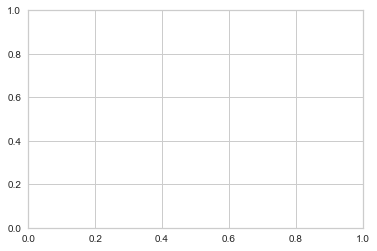

In [148]:
# viz = FeatureImportances(final_KNN.named_steps['model'])
# viz.fit(X_train_feature_j_df,y_train_model)
# viz.show();

In [158]:
def model_visuals(model,X,y,X_test,y_test,num_cols,cat_cols,labels):
    
    #Class Prediction Error
    
    print('\n')
    print(formating.bold+formating.underline+formating.green+'CLASS PREDICTION ERROR'+formating.normal+'\n')
    class_prediction_error(model,X, y, X_test, y_test);
    
    print('\n')
    print('--'*50)
    print('\n')
    
    #Feature Correlation with target variable
    
    print(formating.bold+formating.underline+formating.green+'FEATURE CORRELATION WITH TARGET'+formating.normal+'\n')
    
    fig,axes = plt.subplots(ncols=2,figsize=(15,6))
    
    visualize = FeatureCorrelation(sort = True,ax = axes[0],labels = labels)
    X_train_feature = preprocessing_trial(numerical,categorical).fit_transform(X)
    visualize.fit(X_train_feature,y)
    visualize.show();
    
    visualize2 = FeatureCorrelation(method='mutual_info-classification',sort = True,ax = axes[1],labels = labels)
    X_train_feature = preprocessing_trial(num_cols,cat_cols).fit_transform(X)
    visualize2.fit(X_train_feature,y)
    visualize2.show();
    
    print('\n')
    print('--'*50)
    print('\n')
    
    #Rank Features 1d and 2d
    
    print(formating.bold+formating.underline+formating.green+'RANK FEATURES'+formating.normal+'\n')
    
    fig,axes = plt.subplots(ncols=2, figsize=(15,6))
    rank1d(X_train_feature, ax=axes[0], show=False)
    rank2d(X_train_feature, ax=axes[1], show=False)
    plt.show();

In [182]:
def feature_importances(model_classifier,preprocessed_X,y):
    
    print(formating.bold+formating.underline+formating.green+'FEATURE IMPORTANCES'+formating.normal+'\n')
    
    try:
        fig,ax=plt.subplots(figsize=(7,6))
        viz = FeatureImportances(model_classifier,ax=ax)
        viz.fit(preprocessed_X,y_train_model)
        viz.show();
        fig,ax1=plt.subplots(figsize=(7,6))
        viz2 = FeatureImportances(model_classifier,relative=False,ax=ax1)
        viz2.fit(preprocessed_X,y_train_model)
        viz2.show();
    except:
        print('Feature Importances is not compatable with this classifier')

In [ ]:
def explained_weights(model_classifier,feature_names=cols_j,top=30):
    return eli5.explain_weights(model_classifier,feature_names = feature_names,top = top)



CLASS PREDICTION ERROR



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


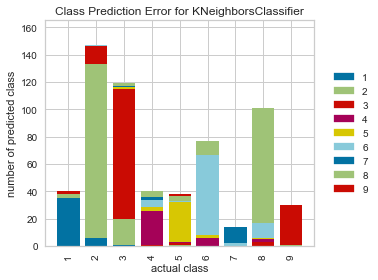



----------------------------------------------------------------------------------------------------


FEATURE CORRELATION WITH TARGET



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


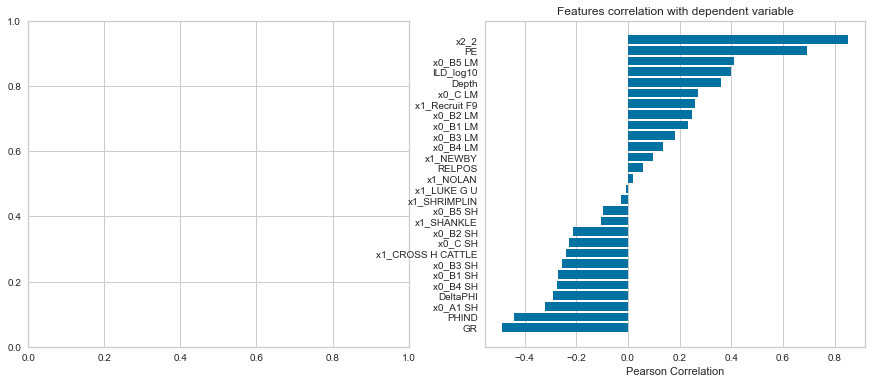

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


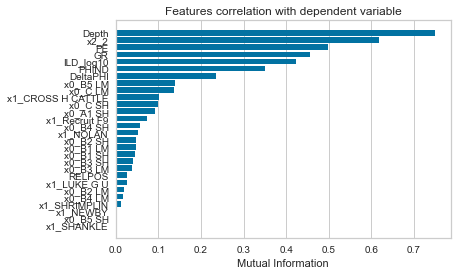



----------------------------------------------------------------------------------------------------


RANK FEATURES



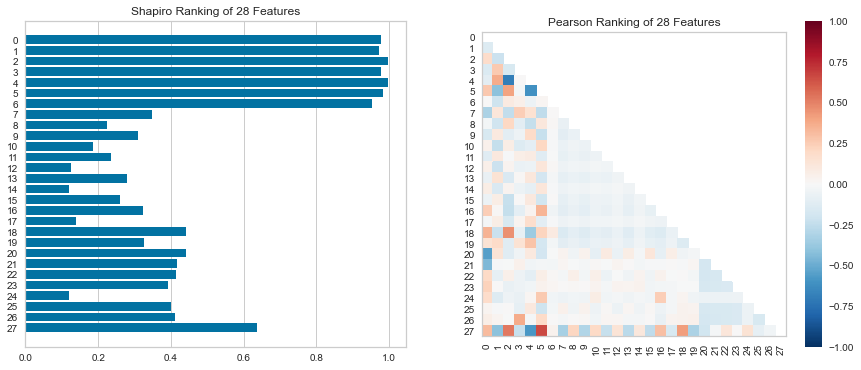

In [160]:
model_visuals(final_KNN,X_train_model,y_train_model,X_validation,y_validation,
              numerical,categorical,cols_j)

FEATURE IMPORTANCES

Feature Importances is not compatable with this classifier


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


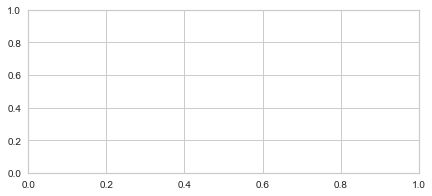

In [178]:
feature_importances(final_KNN.named_steps['model'],X_train_feature_j_df,y_train_model)

In [211]:
explained_weights(final_KNN.named_steps['model'])

Explanation(estimator="KNeighborsClassifier(n_neighbors=2, weights='distance')", description=None, error="estimator KNeighborsClassifier(n_neighbors=2, weights='distance') is not supported", method=None, is_regression=False, targets=None, feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

## Decision Tree

In [96]:
preprocessor_DT = preprocessing_trial(numerical,categorical,transformation = RobustScaler())
DT_vanilla_pipeline = model_pipeline(DecisionTreeClassifier(), preprocessor_DT)
DT_vanilla = DT_vanilla_pipeline.fit(X_train_model, y_train_model)



MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.767442,0.798507,0.715447,0.536585,0.425532,0.676056,0.500000,0.704082,0.935484,0.70132,0.673237,0.710808
recall,0.785714,0.713333,0.765217,0.647059,0.555556,0.607595,0.600000,0.657143,0.966667,0.70132,0.699809,0.701320
f1-score,0.776471,0.753521,0.739496,0.586667,0.481928,0.640000,0.545455,0.679803,0.950820,0.70132,0.683795,0.704000
support,42.000000,150.000000,115.000000,34.000000,36.000000,79.000000,15.000000,105.000000,30.000000,0.70132,606.000000,606.000000




----------------------------------------


Visual Evaluation


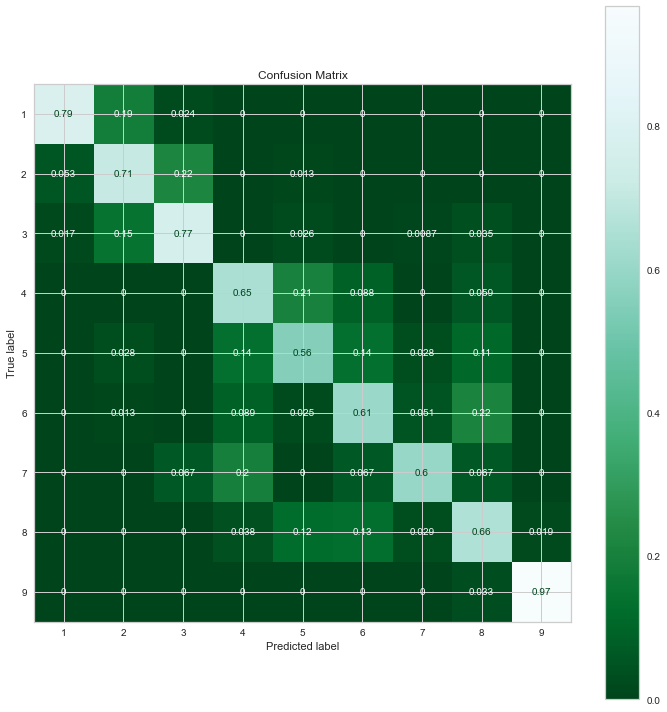

In [97]:
y_hat_DT_vanilla=DT_vanilla.predict(X_validation)
model_evaluation(DT_vanilla,X_validation,y_validation)

### GridSearchCV and Effect of Transformers

#### RobustScaler

In [98]:
def gridsearch_result(model,parameter,X_train,y_train,X_test,y_test,scoring='f1_macro'):
    
    '''Shows the best parameters for highest scoring and the results of the best estimatorthus built
    -------------------------------
    Input:
    
    model (sklearn model): model you want to find the best combination of parameters for
    parameter (dict): parameters to compute from
    scoring (str): score based on which the best estimator will be selected. Defaulted to f1_macro
    X_train (DataFram/Array): training features
    y_train (DataFram/Array): training predictor
    X_test (DataFram/Array): test data for features
    y_test (DataFram/Array): test data for predictor variable
    -------------------------------
    Output:
    
    best estimator parameters
    best estimator result analysis visuals (classification report, confusion matrix)
    '''
    
    cv = GridSearchCV(model,param_grid = parameter,scoring = scoring)
    cv.fit(X_train,y_train)
    
    #Best Parameters
    
    print('\n')
    print(formating.bold + formating.underline+ formating.blue + 'BEST ESTIMATOR PARAMETERS' + formating.normal)
    print(cv.best_params_)
    
    #Best estimator evaluation
    
    display(model_evaluation(cv.best_estimator_,X_test,y_test))
    
    return cv.best_params_ , cv.best_estimator_
    



BEST ESTIMATOR PARAMETERS
{'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__min_samples_leaf': 1}


MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.833333,0.776316,0.765217,0.636364,0.558140,0.638554,0.500000,0.765306,0.928571,0.732673,0.711311,0.738180
recall,0.714286,0.786667,0.765217,0.617647,0.666667,0.670886,0.600000,0.714286,0.866667,0.732673,0.711369,0.732673
f1-score,0.769231,0.781457,0.765217,0.626866,0.607595,0.654321,0.545455,0.738916,0.896552,0.732673,0.709512,0.734437
support,42.000000,150.000000,115.000000,34.000000,36.000000,79.000000,15.000000,105.000000,30.000000,0.732673,606.000000,606.000000




----------------------------------------


Visual Evaluation


None

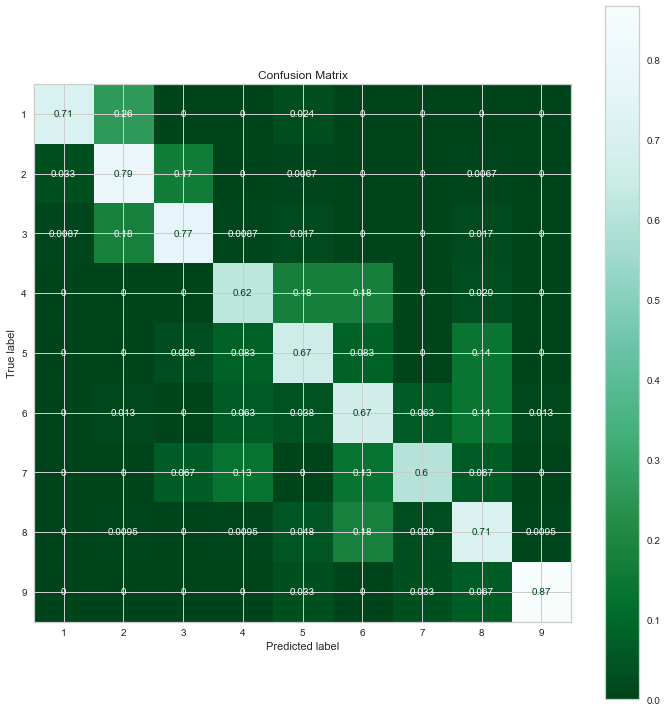

In [106]:
parameter = {'model__criterion': ['gini','entropy'],
             'model__min_samples_leaf': [1,3,5],
             'model__class_weight': [None, 'balanced']}
best_DT_robust_params , best_DT_robust  = gridsearch_result(DT_vanilla,parameter,X_train_model,y_train_model,X_validation,y_validation)

In [107]:
best_DT_robust

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(weights='distance')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Depth', 'GR', 'ILD_log10',
                                                   'DeltaPHI', 'PHIND', 'PE',
                                                   'RELPOS']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('impute',
                                                                   KNNImputer(weights='distance'))]),
                                                  ['Formation', 'Well Name',
                                                   'NM_M'])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy'))])

In [108]:
best_DT_robust_params

{'model__class_weight': 'balanced',
 'model__criterion': 'entropy',
 'model__min_samples_leaf': 1}

#### QuantileTransformer



BEST ESTIMATOR PARAMETERS
{'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__min_samples_leaf': 1}


MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.815789,0.787671,0.754237,0.628571,0.577778,0.670732,0.625000,0.80000,0.935484,0.747525,0.732807,0.752063
recall,0.738095,0.766667,0.773913,0.647059,0.722222,0.696203,0.666667,0.72381,0.966667,0.747525,0.744589,0.747525
f1-score,0.775000,0.777027,0.763948,0.637681,0.641975,0.683230,0.645161,0.76000,0.950820,0.747525,0.737205,0.748725
support,42.000000,150.000000,115.000000,34.000000,36.000000,79.000000,15.000000,105.00000,30.000000,0.747525,606.000000,606.000000




----------------------------------------


Visual Evaluation


None

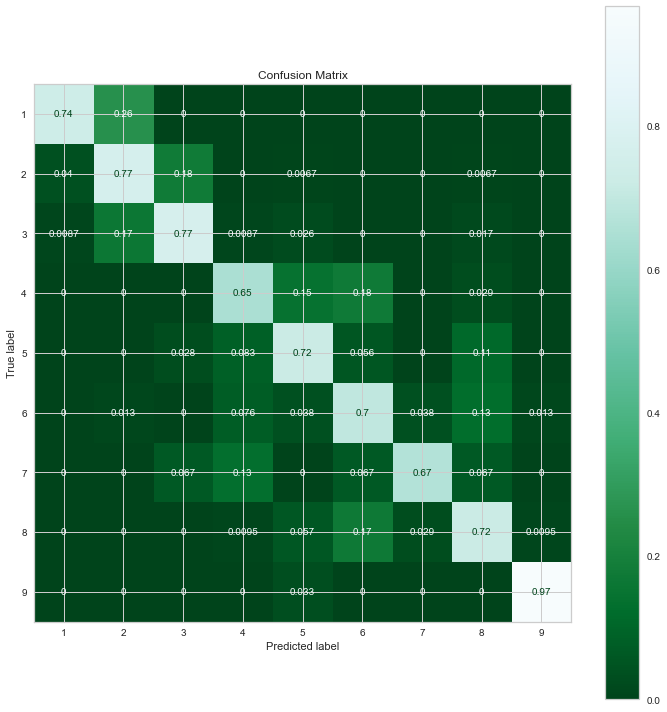

In [109]:
#Quantile Model
preprocessor_quantile_DT = preprocessing_trial(numerical,categorical,transformation = QuantileTransformer())
DT_quantile_pipeline = model_pipeline(DecisionTreeClassifier(), preprocessor_quantile_DT)
DT_quantile = DT_quantile_pipeline.fit(X_train_model, y_train_model)

#Quantile GridSearch:
parameter = {'model__criterion': ['gini','entropy'],
             'model__min_samples_leaf': [1,3,5],
             'model__class_weight': [None, 'balanced']}

best_DT_quantile_params , best_DT_quantile = gridsearch_result(DT_quantile,parameter,X_train_model,y_train_model,X_validation,y_validation)

#### PowerTransformer



BEST ESTIMATOR PARAMETERS
{'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__min_samples_leaf': 1}


MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.833333,0.786207,0.741667,0.625000,0.585366,0.636364,0.6,0.766990,1.000000,0.737624,0.730547,0.743156
recall,0.714286,0.760000,0.773913,0.588235,0.666667,0.708861,0.6,0.752381,0.866667,0.737624,0.714557,0.737624
f1-score,0.769231,0.772881,0.757447,0.606061,0.623377,0.670659,0.6,0.759615,0.928571,0.737624,0.720871,0.739262
support,42.000000,150.000000,115.000000,34.000000,36.000000,79.000000,15.0,105.000000,30.000000,0.737624,606.000000,606.000000




----------------------------------------


Visual Evaluation


None

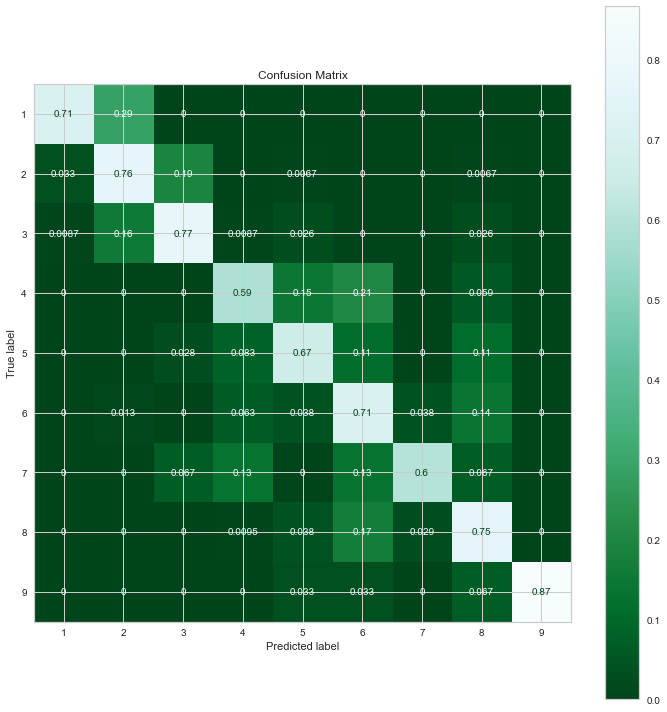

In [110]:
#Power Model
preprocessor_power_DT = preprocessing_trial(numerical,categorical,transformation = PowerTransformer())
DT_power_pipeline = model_pipeline(DecisionTreeClassifier(), preprocessor_power_DT)
DT_power = DT_power_pipeline.fit(X_train_model, y_train_model)

#Power GridSearch:
parameter = {'model__criterion': ['gini','entropy'],
             'model__min_samples_leaf': [1,3,5],
             'model__class_weight': [None, 'balanced']}

best_DT_power_params , best_DT_power = gridsearch_result(DT_power,parameter,X_train_model,y_train_model,X_validation,y_validation)

### Visualization and Best Estimator Selection

#### Best Estimator

In [111]:
def score_compare(models, X_test, y_test, parameters,parameter_name, target_variable,
                  classification_score = 'f1-score', palette='mako'):
    
    #Dictionary of all scores
    
    scores = {}
    for i in range(len(parameters)):
        y_hat = models[i].predict(X_test)
        report = pd.DataFrame(metrics.classification_report(y_test,y_hat,output_dict=True))
        scores[parameters[i]]=report.loc[classification_score]
    
    #table
    
    f1_table = pd.DataFrame(scores).reset_index()
    f1_table = f1_table.rename(columns = {'index':target_variable})
    f1_table_formation = f1_table.loc[:(len(f1_table)-4)]
    
    table = pd.melt(f1_table_formation, id_vars=[target_variable],
                    value_name=classification_score, var_name = parameter_name)
    
    #plot
    
    fig,axes = plt.subplots(figsize = (10,6))
    sns.barplot(target_variable, classification_score, hue = parameter_name, data = table, palette=palette, ax=axes);
    axes.set_title('Individual Analysis')

In [112]:
def f1_compare(models, X_test, y_test, parameters,average='macro'):
    
    print('\n'+formating.underline+f'Average f1_score'+'\n')
    
    f1_macro = {}
    for i in range(len(parameters)):
        y_hat_ = models[i].predict(X_test)
        f1 = round(metrics.f1_score(y_test,y_hat_,average=average),5)
        f1_macro[parameters[i]]=f1
    
    return f1_macro


Average f1_score



{'RobustScaler': 0.70951,
 'QuantileTransformer': 0.7372,
 'PowerTransformer': 0.72087}

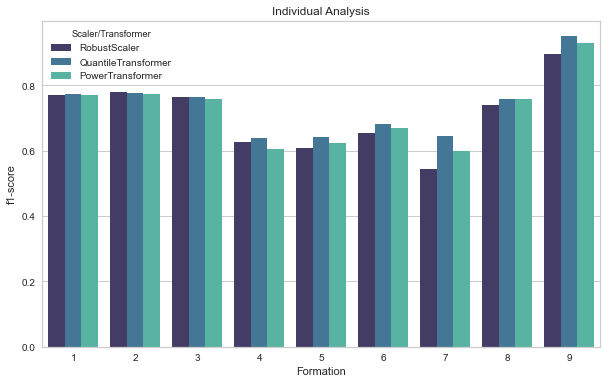

In [113]:
models = [best_DT_robust,best_DT_quantile,best_DT_power]

score_compare(models, X_validation, y_validation, parameters=description,parameter_name='Scaler/Transformer',
              target_variable='Formation')
f1_compare(models, X_validation, y_validation, parameters=description)

##### Therefore the best DecisionTree estimator is : Final Model - `best_DT_quantile` 

In [114]:
best_DT_quantile,best_DT_quantile_params

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('impute',
                                                                    KNNImputer(weights='distance')),
                                                                   ('scaler',
                                                                    QuantileTransformer())]),
                                                   ['Depth', 'GR', 'ILD_log10',
                                                    'DeltaPHI', 'PHIND', 'PE',
                                                    'RELPOS']),
                                                  ('cat',
                                                   Pipeline(steps=[('ohe',
                                                                    OneHotEncoder(drop='first',
                                                                                  sparse=False)),
       

#### Model Visualization

In [115]:
# #Feature Importances
# best_DT = best_DT_quantile.fit(X_train_model,y_train_model)
# best_DT.feature_importances_



CLASS PREDICTION ERROR



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


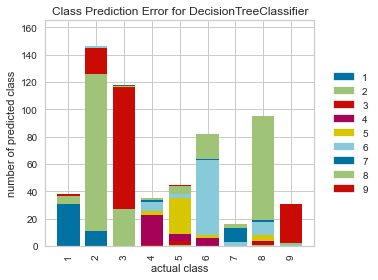



----------------------------------------------------------------------------------------------------


FEATURE CORRELATION WITH TARGET



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


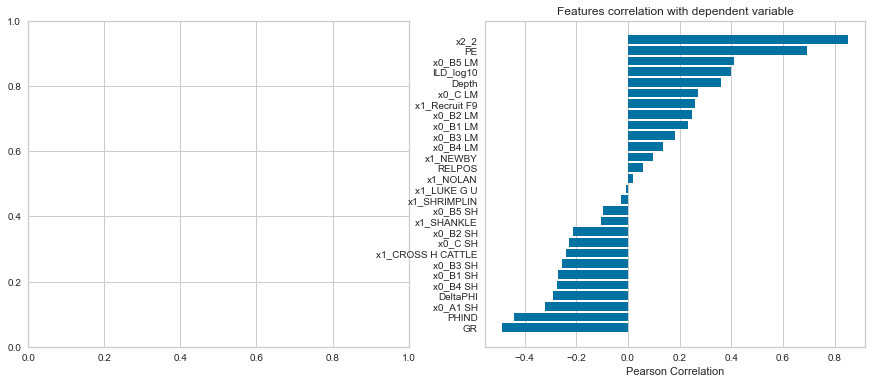

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


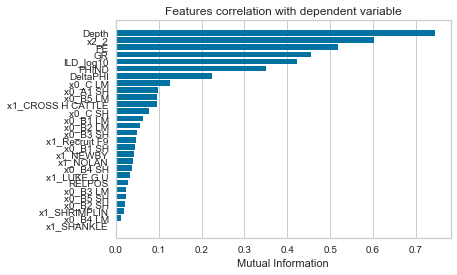



----------------------------------------------------------------------------------------------------


RANK FEATURES



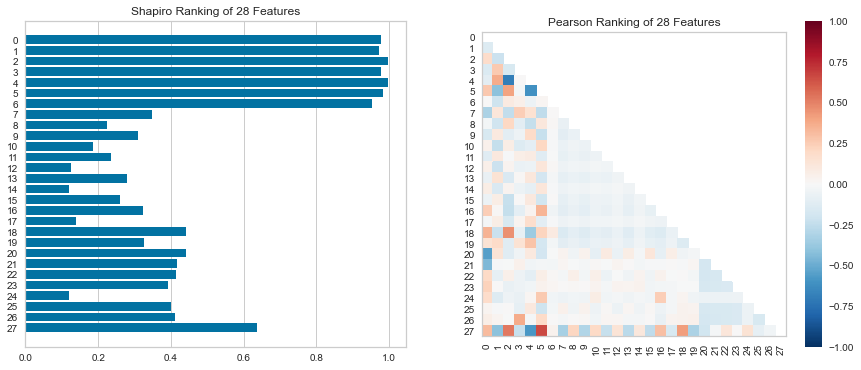

In [164]:
model_visuals(best_DT_quantile,
              X_train_model,y_train_model,X_validation,y_validation,
              numerical,categorical,cols_j)

In [134]:
best_DT_quantile.named_steps['model']

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

In [218]:
explained_weights(best_DT_quantile.named_steps['model'])

Weight,Feature
0.2586,x2_2
0.1242,Depth
0.0978,ILD_log10
0.0974,RELPOS
0.0908,PE
0.0874,GR
0.0663,DeltaPHI
0.0460,PHIND
0.0282,x1_CROSS H CATTLE
0.0202,x1_SHANKLE


In [142]:
best_DT_quantile.named_steps['model'].feature_importances_

array([0.12423869, 0.08737134, 0.09777944, 0.0663051 , 0.0460449 ,
       0.09076884, 0.09744274, 0.00332439, 0.00473524, 0.00164093,
       0.0097295 , 0.        , 0.005771  , 0.00145056, 0.001044  ,
       0.00061391, 0.00628725, 0.00029986, 0.01407643, 0.00118935,
       0.02822584, 0.00374826, 0.01022134, 0.01675457, 0.        ,
       0.02022347, 0.00207964, 0.25863343])

FEATURE IMPORTANCES



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


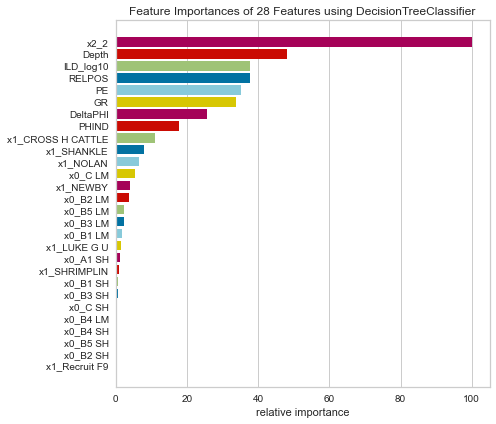

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


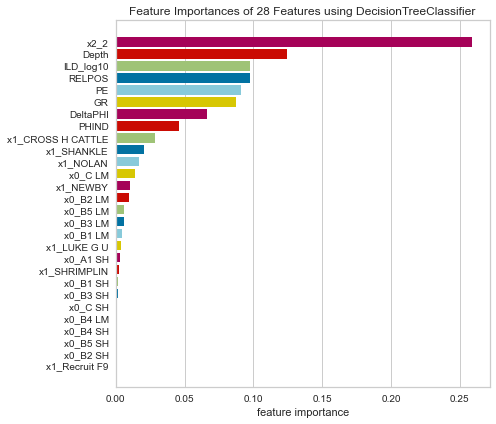

In [183]:
feature_importances(best_DT_quantile.named_steps['model'],X_train_feature_j_df,y_train_model)

## Random Forest



MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.911765,0.822785,0.831858,0.641026,0.736842,0.716216,0.785714,0.811321,0.933333,0.80198,0.798984,0.804047
recall,0.738095,0.866667,0.817391,0.735294,0.777778,0.670886,0.733333,0.819048,0.933333,0.80198,0.787981,0.801980
f1-score,0.815789,0.844156,0.824561,0.684932,0.756757,0.692810,0.758621,0.815166,0.933333,0.80198,0.791792,0.801891
support,42.000000,150.000000,115.000000,34.000000,36.000000,79.000000,15.000000,105.000000,30.000000,0.80198,606.000000,606.000000




----------------------------------------


Visual Evaluation


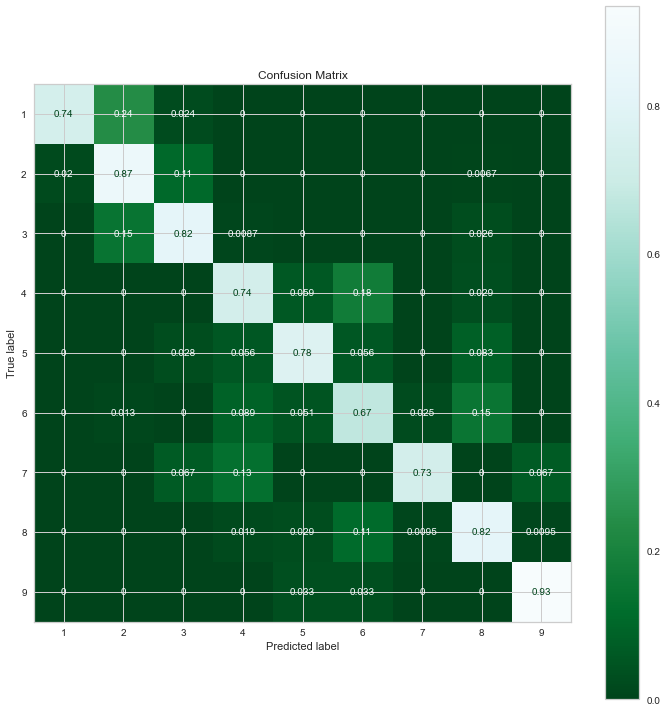

In [117]:
preprocessor_RF = preprocessing_trial(numerical,categorical,transformation = RobustScaler())
RF_vanilla_pipeline = model_pipeline(RandomForestClassifier(), preprocessor_RF)
RF_vanilla = RF_vanilla_pipeline.fit(X_train_model, y_train_model)
model_evaluation(RF_vanilla,X_validation,y_validation)

### GridSearchCV and Effect of Transformers

#### RobustScaler



BEST ESTIMATOR PARAMETERS
{'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__min_samples_leaf': 1}


MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.918919,0.844156,0.842105,0.657895,0.675676,0.739726,0.846154,0.783784,1.000000,0.810231,0.812046,0.812180
recall,0.809524,0.866667,0.834783,0.735294,0.694444,0.683544,0.733333,0.828571,0.966667,0.810231,0.794759,0.810231
f1-score,0.860759,0.855263,0.838428,0.694444,0.684932,0.710526,0.785714,0.805556,0.983051,0.810231,0.802075,0.810431
support,42.000000,150.000000,115.000000,34.000000,36.000000,79.000000,15.000000,105.000000,30.000000,0.810231,606.000000,606.000000




----------------------------------------


Visual Evaluation


None

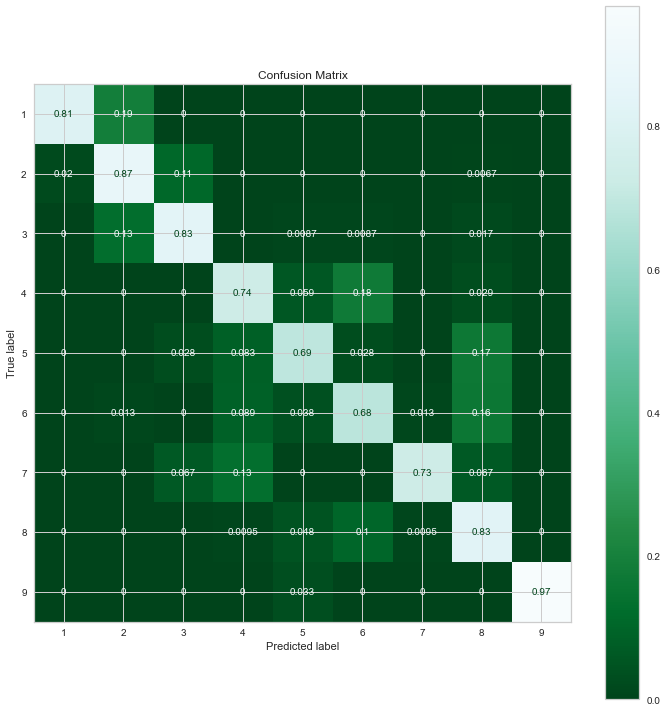

In [118]:
parameter = {'model__criterion': ['gini','entropy'],
             'model__min_samples_leaf': [1,3,5],
             'model__class_weight': [None, 'balanced']}
best_RF_robust_params , best_RF_robust = gridsearch_result(RF_vanilla,parameter,X_train_model,y_train_model,X_validation,y_validation)

#### QuantileTransformer



BEST ESTIMATOR PARAMETERS
{'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__min_samples_leaf': 1}


MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.944444,0.856209,0.837607,0.657895,0.735294,0.717949,0.785714,0.794393,1.000000,0.815182,0.814389,0.817123
recall,0.809524,0.873333,0.852174,0.735294,0.694444,0.708861,0.733333,0.809524,0.966667,0.815182,0.798128,0.815182
f1-score,0.871795,0.864686,0.844828,0.694444,0.714286,0.713376,0.758621,0.801887,0.983051,0.815182,0.805219,0.815552
support,42.000000,150.000000,115.000000,34.000000,36.000000,79.000000,15.000000,105.000000,30.000000,0.815182,606.000000,606.000000




----------------------------------------


Visual Evaluation


None

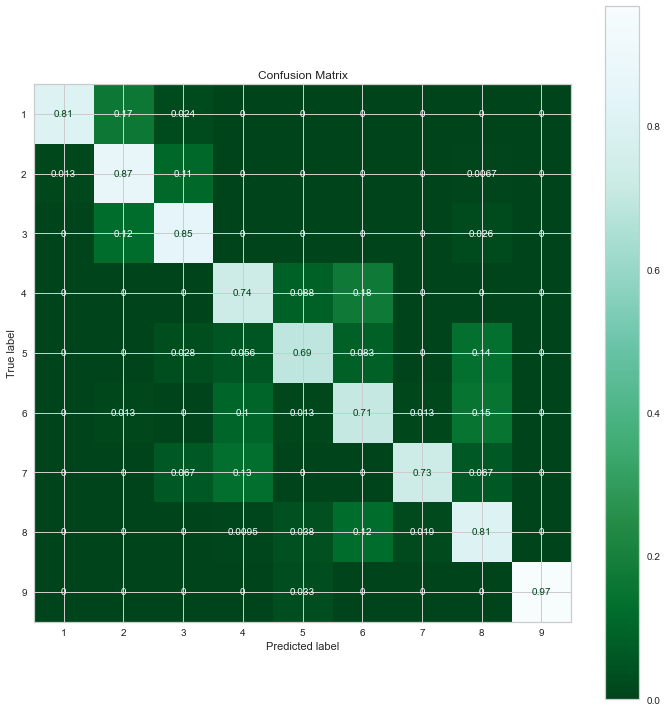

In [119]:
#Quantile Model
preprocessor_quantile_RF = preprocessing_trial(numerical,categorical,transformation = QuantileTransformer())
RF_quantile_pipeline = model_pipeline(RandomForestClassifier(), preprocessor_quantile_RF)
RF_quantile = RF_quantile_pipeline.fit(X_train_model, y_train_model)

#Quantile GridSearch:
parameter = {'model__criterion': ['gini','entropy'],
             'model__min_samples_leaf': [1,3,5],
             'model__class_weight': [None, 'balanced']}

best_RF_quantile_params , best_RF_quantile = gridsearch_result(RF_quantile,parameter,X_train_model,y_train_model,X_validation,y_validation)

#### PowerTransformer



BEST ESTIMATOR PARAMETERS
{'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__min_samples_leaf': 1}


MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.916667,0.842105,0.820513,0.675676,0.710526,0.730769,0.687500,0.836538,1.000000,0.811881,0.802255,0.814532
recall,0.785714,0.853333,0.834783,0.735294,0.750000,0.721519,0.733333,0.828571,0.933333,0.811881,0.797320,0.811881
f1-score,0.846154,0.847682,0.827586,0.704225,0.729730,0.726115,0.709677,0.832536,0.965517,0.811881,0.798802,0.812652
support,42.000000,150.000000,115.000000,34.000000,36.000000,79.000000,15.000000,105.000000,30.000000,0.811881,606.000000,606.000000




----------------------------------------


Visual Evaluation


None

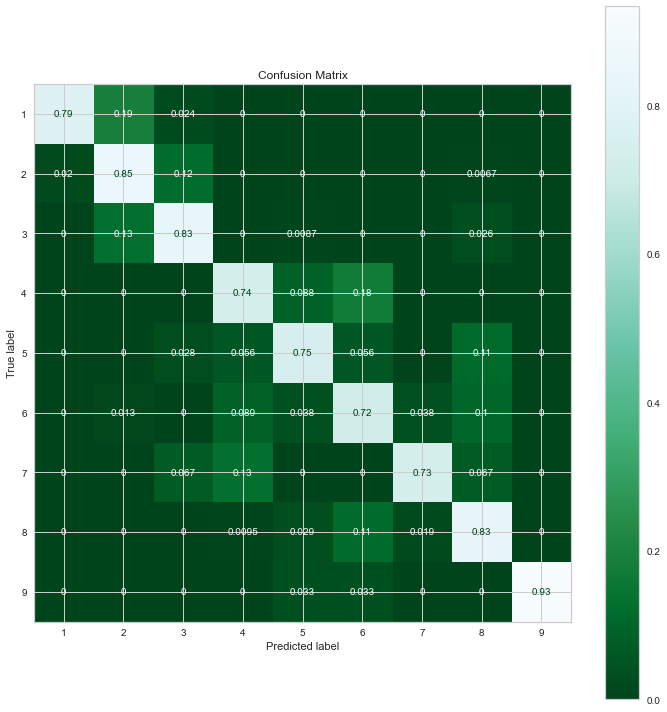

In [120]:
#Power Model
preprocessor_power_RF = preprocessing_trial(numerical,categorical,transformation = PowerTransformer())
RF_power_pipeline = model_pipeline(RandomForestClassifier(), preprocessor_power_RF)
RF_power = RF_power_pipeline.fit(X_train_model, y_train_model)

#Power GridSearch:
parameter = {'model__criterion': ['gini','entropy'],
             'model__min_samples_leaf': [1,3,5],
             'model__class_weight': [None, 'balanced']}

best_RF_power_params , best_RF_power = gridsearch_result(RF_power,parameter,X_train_model,y_train_model,X_validation,y_validation)

### Visualization and Best Estimator Selection

#### Best Estimator


Average f1_score



{'RobustScaler': 0.80207,
 'QuantileTransformer': 0.80522,
 'PowerTransformer': 0.7988}

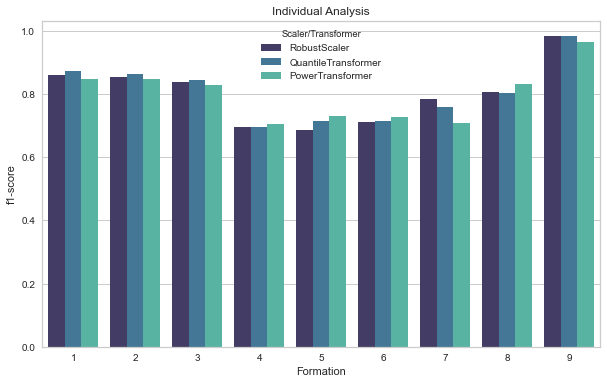

In [121]:
models = [best_RF_robust,best_RF_quantile,best_RF_power]

score_compare(models, X_validation, y_validation, parameters=description,parameter_name='Scaler/Transformer',
              target_variable='Formation')
f1_compare(models, X_validation, y_validation, parameters=description)

##### Therefore the best DecisionTree estimator is : Final Model - `best_RF_quantile` 

In [122]:
best_RF_quantile_params,best_RF_quantile

({'model__class_weight': 'balanced',
  'model__criterion': 'entropy',
  'model__min_samples_leaf': 1},
 Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('impute',
                                                                    KNNImputer(weights='distance')),
                                                                   ('scaler',
                                                                    QuantileTransformer())]),
                                                   ['Depth', 'GR', 'ILD_log10',
                                                    'DeltaPHI', 'PHIND', 'PE',
                                                    'RELPOS']),
                                                  ('cat',
                                                   Pipeline(steps=[('ohe',
                                                                    OneHotEncoder(drop='first',
  

#### Model Visualization



CLASS PREDICTION ERROR



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


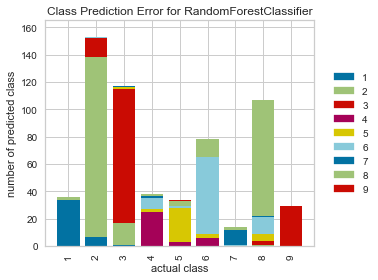



----------------------------------------------------------------------------------------------------


FEATURE CORRELATION WITH TARGET



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


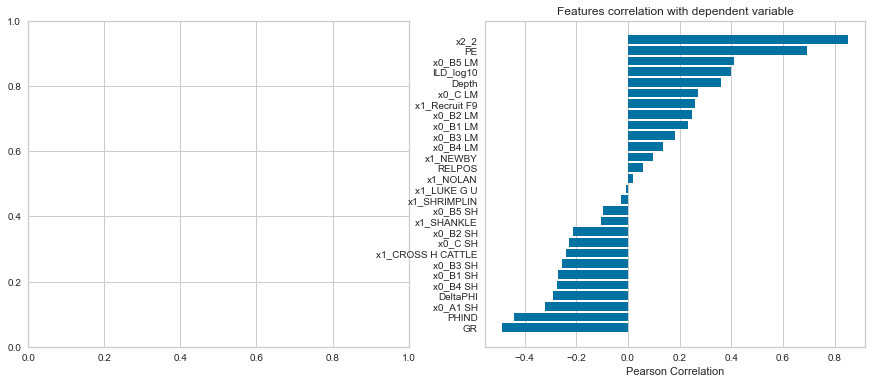

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


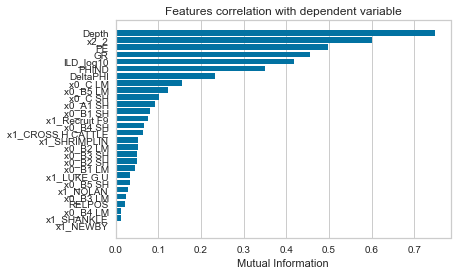



----------------------------------------------------------------------------------------------------


RANK FEATURES



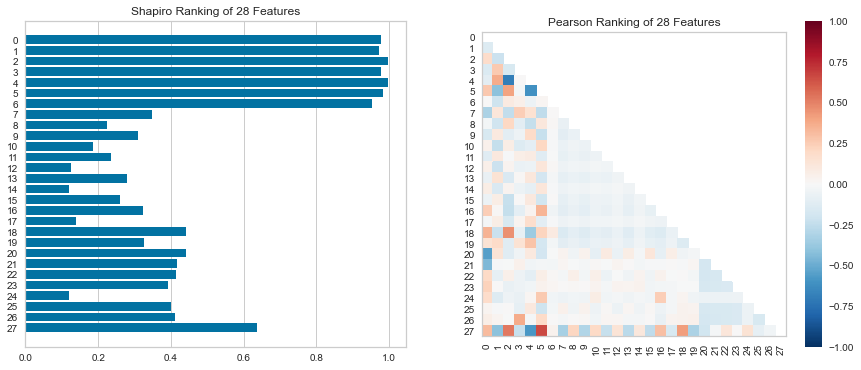

In [123]:
model_visuals(best_RF_quantile,X_train_model,y_train_model,X_validation,y_validation,numerical,categorical,cols_j)

In [215]:
best_RF_quantile.named_steps['model']

RandomForestClassifier(class_weight='balanced', criterion='entropy')

FEATURE IMPORTANCES



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


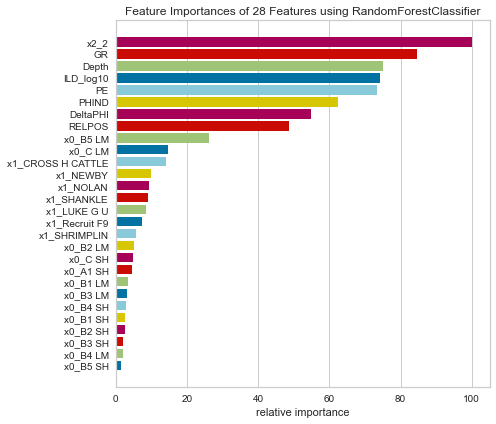

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


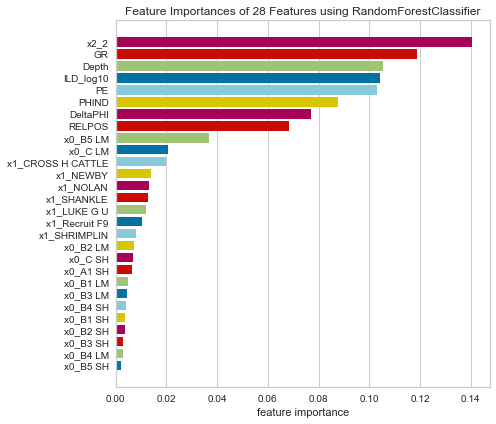

In [216]:
feature_importances(best_RF_quantile.named_steps['model'],X_train_feature_j_df,y_train_model)

In [217]:
explained_weights(best_RF_quantile.named_steps['model'])

Weight,Feature
0.1404 ± 0.1546,x2_2
0.1187 ± 0.0872,GR
0.1055 ± 0.0611,Depth
0.1040 ± 0.0760,ILD_log10
0.1028 ± 0.0946,PE
0.0876 ± 0.0625,PHIND
0.0770 ± 0.0482,DeltaPHI
0.0684 ± 0.0301,RELPOS
0.0367 ± 0.0552,x0_B5 LM
0.0206 ± 0.0313,x0_C LM


## SVM



MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.800000,0.811688,0.789474,0.666667,0.647059,0.654762,0.90,0.727273,0.962963,0.760726,0.773321,0.763337
recall,0.761905,0.833333,0.782609,0.647059,0.611111,0.696203,0.60,0.761905,0.866667,0.760726,0.728977,0.760726
f1-score,0.780488,0.822368,0.786026,0.656716,0.628571,0.674847,0.72,0.744186,0.912281,0.760726,0.747276,0.760902
support,42.000000,150.000000,115.000000,34.000000,36.000000,79.000000,15.00,105.000000,30.000000,0.760726,606.000000,606.000000




----------------------------------------


Visual Evaluation


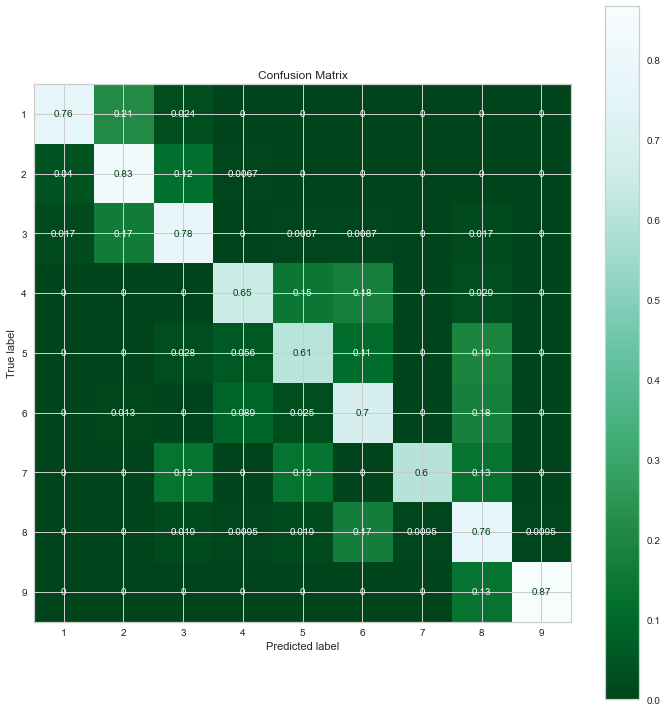

In [124]:
preprocessor_SVM = preprocessing_trial(numerical,categorical,transformation = RobustScaler())
SVM_vanilla_pipeline = model_pipeline(SVC(), preprocessor_SVM)
SVM_vanilla = SVM_vanilla_pipeline.fit(X_train_model, y_train_model)
model_evaluation(SVM_vanilla,X_validation,y_validation)

### GridSearchCV and Effect of Transformers

#### RobustScaler

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py", line 181, in fit
    .format(X.shape[0], X.shape[1]))
ValueError: Precomputed matrix must be a square matrix. Input is a 1453x28 matrix.

  FitFailedWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit f



BEST ESTIMATOR PARAMETERS
{'model__class_weight': None, 'model__kernel': 'rbf'}


MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.800000,0.811688,0.789474,0.666667,0.647059,0.654762,0.90,0.727273,0.962963,0.760726,0.773321,0.763337
recall,0.761905,0.833333,0.782609,0.647059,0.611111,0.696203,0.60,0.761905,0.866667,0.760726,0.728977,0.760726
f1-score,0.780488,0.822368,0.786026,0.656716,0.628571,0.674847,0.72,0.744186,0.912281,0.760726,0.747276,0.760902
support,42.000000,150.000000,115.000000,34.000000,36.000000,79.000000,15.00,105.000000,30.000000,0.760726,606.000000,606.000000




----------------------------------------


Visual Evaluation


None

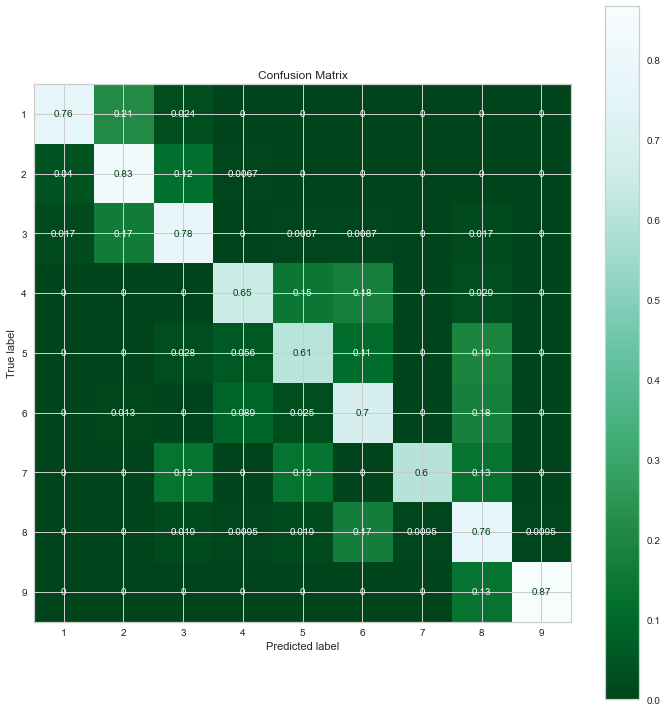

In [125]:
parameter = {'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
             'model__class_weight': [None, 'balanced']}
best_SVM_robust_params , best_SVM_robust = gridsearch_result(SVM_vanilla,parameter,X_train_model,y_train_model,X_validation,y_validation)

#### QuantileTransformer

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py", line 181, in fit
    .format(X.shape[0], X.shape[1]))
ValueError: Precomputed matrix must be a square matrix. Input is a 1453x28 matrix.

  FitFailedWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit f



BEST ESTIMATOR PARAMETERS
{'model__class_weight': None, 'model__kernel': 'poly'}


MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.725490,0.845070,0.810811,0.676471,0.648649,0.651163,0.750000,0.752381,0.928571,0.765677,0.754290,0.769595
recall,0.880952,0.800000,0.782609,0.676471,0.666667,0.708861,0.600000,0.752381,0.866667,0.765677,0.748290,0.765677
f1-score,0.795699,0.821918,0.796460,0.676471,0.657534,0.678788,0.666667,0.752381,0.896552,0.765677,0.749163,0.766488
support,42.000000,150.000000,115.000000,34.000000,36.000000,79.000000,15.000000,105.000000,30.000000,0.765677,606.000000,606.000000




----------------------------------------


Visual Evaluation


None

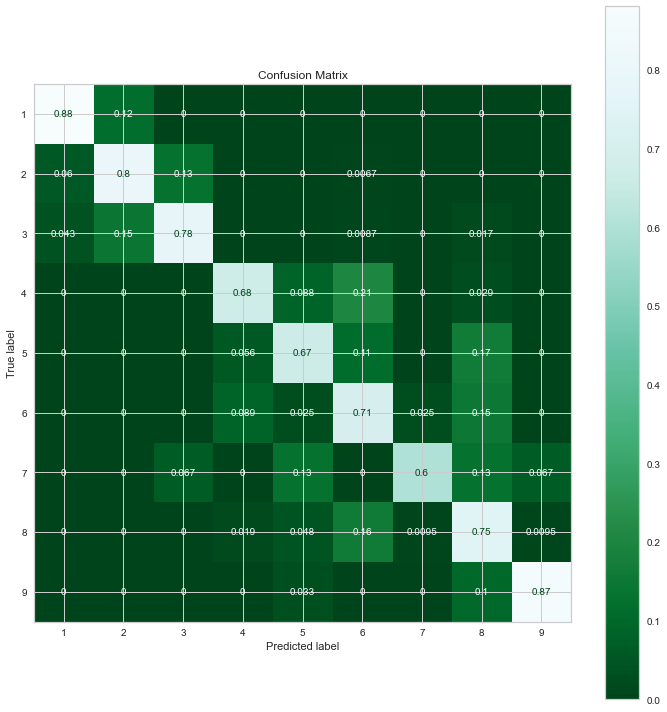

In [126]:
#Quantile Model
preprocessor_quantile_SVM = preprocessing_trial(numerical,categorical,transformation = QuantileTransformer())
SVM_quantile_pipeline = model_pipeline(SVC(), preprocessor_quantile_SVM)
SVM_quantile = SVM_quantile_pipeline.fit(X_train_model, y_train_model)

#Quantile GridSearch
parameter = {'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
             'model__class_weight': [None, 'balanced']}
best_SVM_quantile_params , best_SVM_quantile = gridsearch_result(SVM_quantile,parameter,X_train_model,y_train_model,X_validation,y_validation)

#### PowerTransformer

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py", line 181, in fit
    .format(X.shape[0], X.shape[1]))
ValueError: Precomputed matrix must be a square matrix. Input is a 1453x28 matrix.

  FitFailedWarning)
C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit f



BEST ESTIMATOR PARAMETERS
{'model__class_weight': None, 'model__kernel': 'rbf'}


MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.815789,0.797468,0.794643,0.615385,0.714286,0.679487,0.90,0.741379,0.962963,0.765677,0.780156,0.768676
recall,0.738095,0.840000,0.773913,0.705882,0.555556,0.670886,0.60,0.819048,0.866667,0.765677,0.730005,0.765677
f1-score,0.775000,0.818182,0.784141,0.657534,0.625000,0.675159,0.72,0.778281,0.912281,0.765677,0.749509,0.764909
support,42.000000,150.000000,115.000000,34.000000,36.000000,79.000000,15.00,105.000000,30.000000,0.765677,606.000000,606.000000




----------------------------------------


Visual Evaluation


None

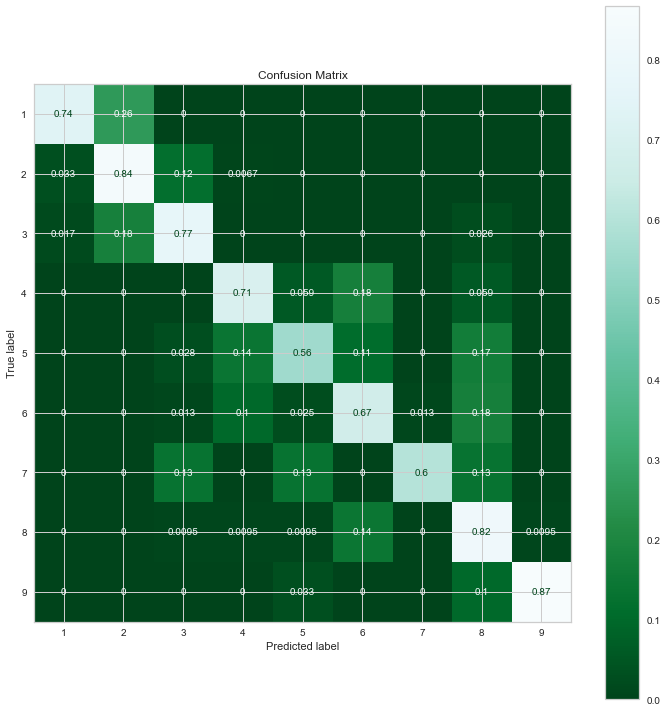

In [127]:
#Power Model
preprocessor_power_SVM = preprocessing_trial(numerical,categorical,transformation = PowerTransformer())
SVM_power_pipeline = model_pipeline(SVC(), preprocessor_power_SVM)
SVM_power = SVM_power_pipeline.fit(X_train_model, y_train_model)

#Power GridSearch:
parameter = {'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
             'model__class_weight': [None, 'balanced']}
best_SVM_power_params , best_SVM_power = gridsearch_result(SVM_power,parameter,X_train_model,y_train_model,X_validation,y_validation)

### Visualization and Best Estimator Selection

#### Best Estimator


Average f1_score



{'RobustScaler': 0.74728,
 'QuantileTransformer': 0.74916,
 'PowerTransformer': 0.74951}

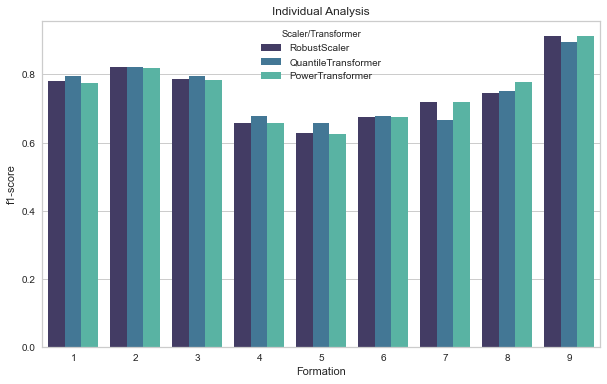

In [128]:
models = [best_SVM_robust,best_SVM_quantile,best_SVM_power]

score_compare(models, X_validation, y_validation, parameters=description,parameter_name='Scaler/Transformer',
              target_variable='Formation')
f1_compare(models, X_validation, y_validation, parameters=description)

##### Therefore the best DecisionTree estimator is : Final Model - `best_RF_quantile` 

In [129]:
best_SVM_power_params,best_SVM_power

({'model__class_weight': None, 'model__kernel': 'rbf'},
 Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('impute',
                                                                    KNNImputer(weights='distance')),
                                                                   ('scaler',
                                                                    PowerTransformer())]),
                                                   ['Depth', 'GR', 'ILD_log10',
                                                    'DeltaPHI', 'PHIND', 'PE',
                                                    'RELPOS']),
                                                  ('cat',
                                                   Pipeline(steps=[('ohe',
                                                                    OneHotEncoder(drop='first',
                                                    

#### Model Evaluation



CLASS PREDICTION ERROR



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


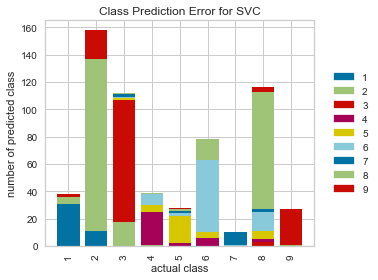



----------------------------------------------------------------------------------------------------


FEATURE CORRELATION WITH TARGET



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


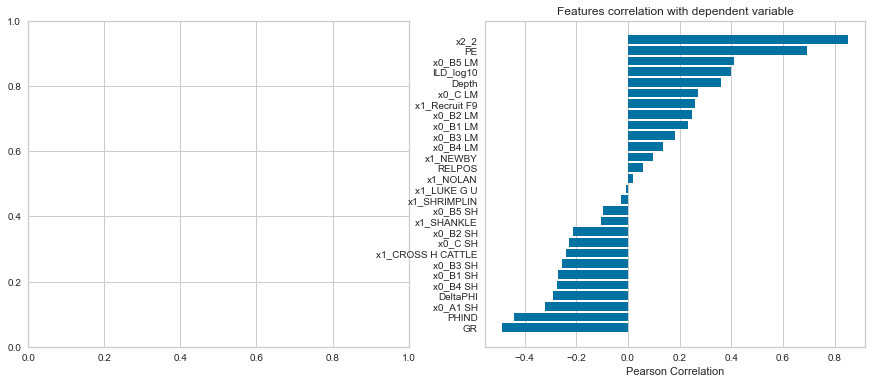

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


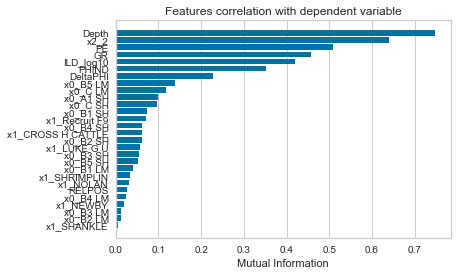



----------------------------------------------------------------------------------------------------


RANK FEATURES



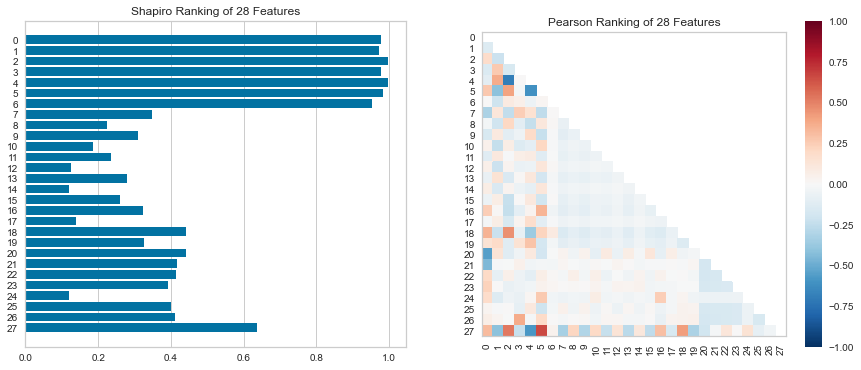

In [130]:
model_visuals(best_SVM_power,X_train_model,y_train_model,X_validation,y_validation,numerical,categorical,cols_j)

In [219]:
best_SVM_power.named_steps['model']

SVC()

FEATURE IMPORTANCES

Feature Importances is not compatable with this classifier


C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


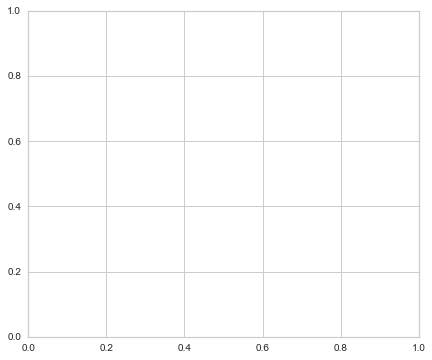

In [220]:
feature_importances(best_SVM_power.named_steps['model'],X_train_feature_j_df,y_train_model)

In [221]:
explained_weights(best_SVM_power.named_steps['model'])

Explanation(estimator='SVC()', description=None, error="only kernel='linear' is currently supported for libsvm-based classifiers", method=None, is_regression=False, targets=None, feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

## XG Boost

In [131]:
#Stacking Classifier?

## Stacking Classifier

In [132]:
estimators = [final_KNN,best_DT_quantile,best_RF_quantile,best_SVM_power]
sc = StackingClassifier(estimators)
sc_model = sc.fit(X_train_model,y_train_model)
model_evaluation(sc_model,X_validation,y_validation)

TypeError: argument of type 'ColumnTransformer' is not iterable

In [223]:
KNN = final_KNN.named_steps['model']
DT = best_DT_quantile.named_steps['model']
RF = best_RF_quantile.named_steps['model']
SVM = best_SVM_power.named_steps['model']

estimators = [KNN,DT,RF,SVM]
sc = StackingClassifier(estimators)
sc_model = sc.fit(X_train_model,y_train_model)
model_evaluation(sc_model,X_validation,y_validation)

TypeError: zip argument #1 must support iteration

## Results and Interpretations

### Best Estimator


Average f1_score



{'KNN': 0.81628, 'DT': 0.7372, 'RF': 0.80522, 'SVM': 0.74951}

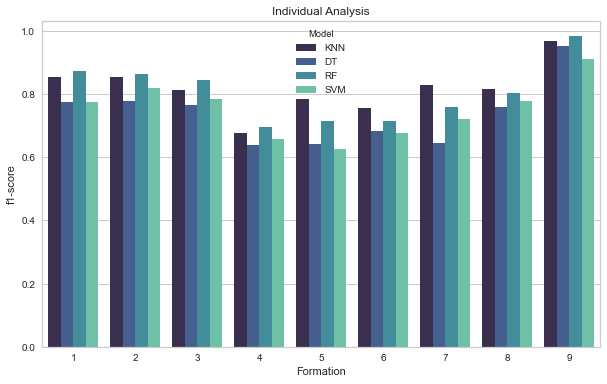

In [225]:
#Best estimator
models = [final_KNN,best_DT_quantile,best_RF_quantile, best_SVM_power]
labeling = ['KNN','DT','RF','SVM']
score_compare(models, X_validation, y_validation, parameters=labeling,parameter_name='Model',
              target_variable='Formation')
f1_compare(models, X_validation, y_validation, parameters=labeling)

### Addressing the Class Imbalance

### Best Model Analysis

#### Visuals



CLASS PREDICTION ERROR



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


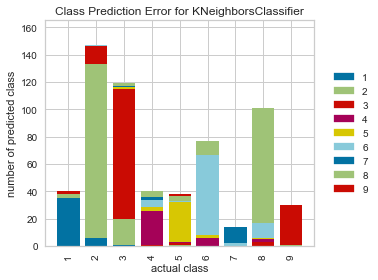



----------------------------------------------------------------------------------------------------


FEATURE CORRELATION WITH TARGET



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


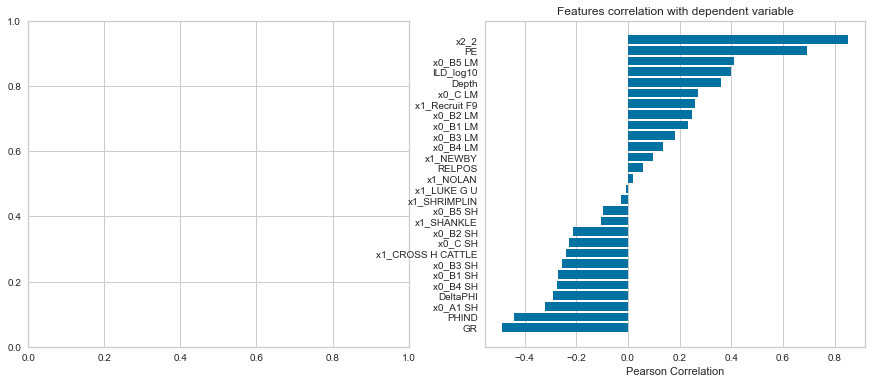

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


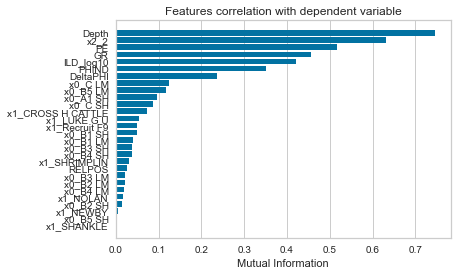



----------------------------------------------------------------------------------------------------


RANK FEATURES



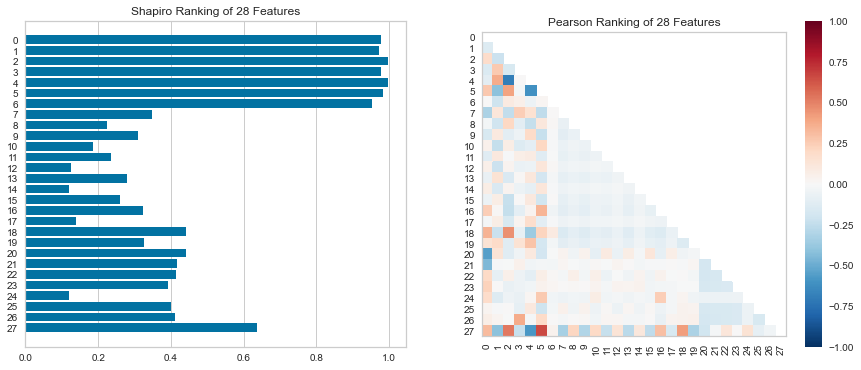

In [226]:
model_visuals(final_KNN,X_train_model,y_train_model,X_validation,y_validation,numerical,categorical,cols_j)

since feature importances and weights do not work with KNN, we will look into the next best mode, RF:

FEATURE IMPORTANCES



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


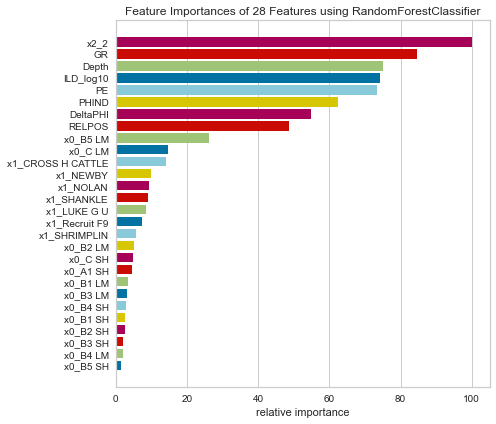

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


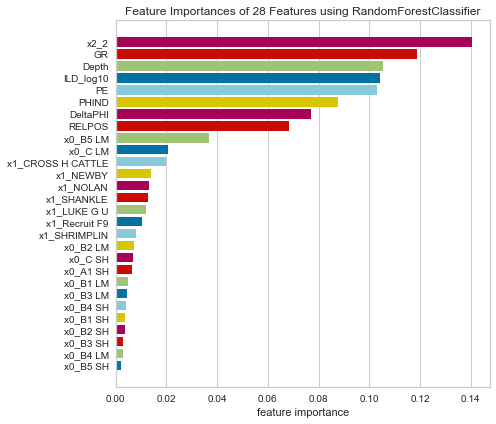

In [227]:
feature_importances(best_RF_quantile.named_steps['model'],X_train_feature_j_df,y_train_model)

In [229]:
explained_weights(best_RF_quantile.named_steps['model'])

Weight,Feature
0.1404 ± 0.1546,x2_2
0.1187 ± 0.0872,GR
0.1055 ± 0.0611,Depth
0.1040 ± 0.0760,ILD_log10
0.1028 ± 0.0946,PE
0.0876 ± 0.0625,PHIND
0.0770 ± 0.0482,DeltaPHI
0.0684 ± 0.0301,RELPOS
0.0367 ± 0.0552,x0_B5 LM
0.0206 ± 0.0313,x0_C LM


#### Test Data Performance



MODEL EVALUATION


Classification Report


,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.867470,0.891429,0.851613,0.826087,0.763636,0.766129,1.000000,0.816514,0.878049,0.841584,0.851214,0.843602
recall,0.986301,0.834225,0.857143,0.826087,0.823529,0.826087,0.833333,0.747899,0.923077,0.841584,0.850854,0.841584
f1-score,0.923077,0.861878,0.854369,0.826087,0.792453,0.794979,0.909091,0.780702,0.900000,0.841584,0.849182,0.841322
support,73.000000,187.000000,154.000000,46.000000,51.000000,115.000000,24.000000,119.000000,39.000000,0.841584,808.000000,808.000000




----------------------------------------


Visual Evaluation


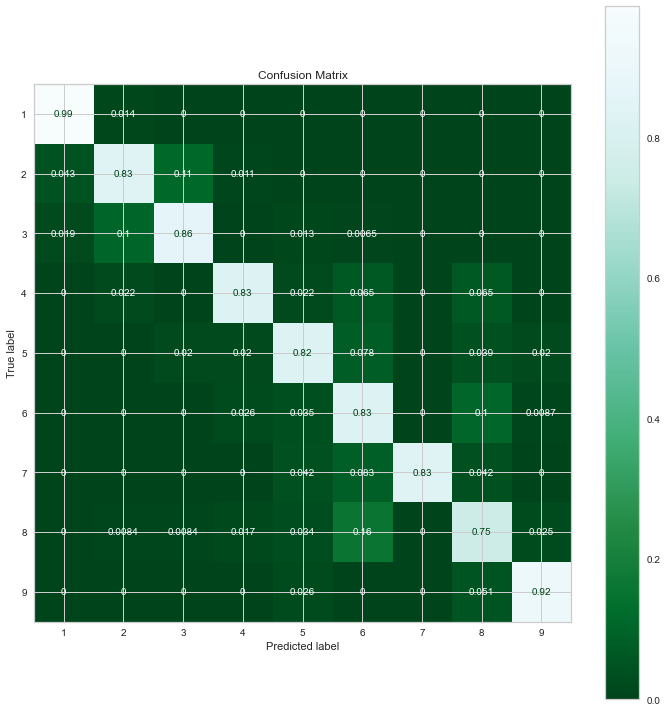

In [230]:
model = final_KNN.fit(X_train,y_train)
model_evaluation(model,X_test,y_test)



CLASS PREDICTION ERROR



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


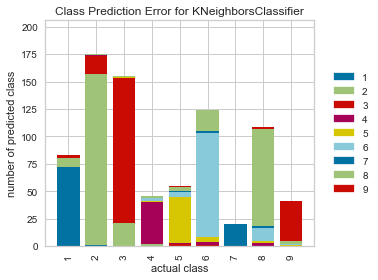



----------------------------------------------------------------------------------------------------


FEATURE CORRELATION WITH TARGET



C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


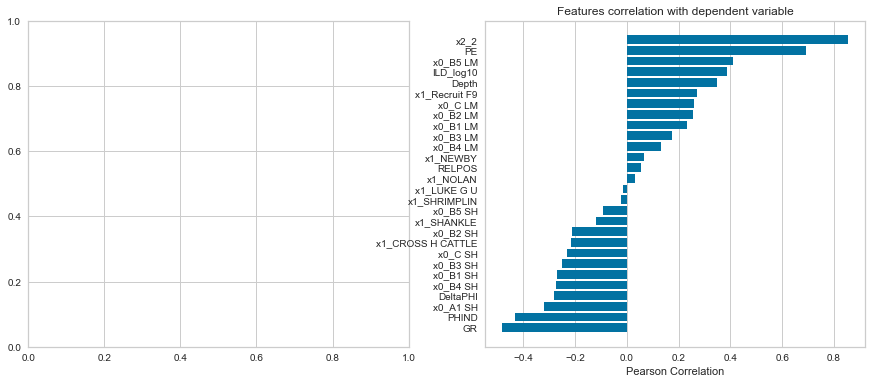

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


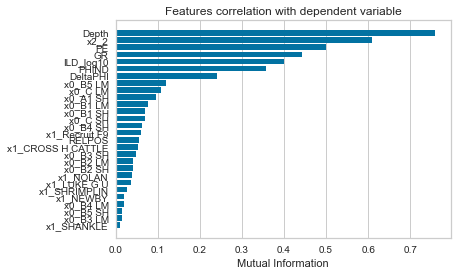



----------------------------------------------------------------------------------------------------


RANK FEATURES



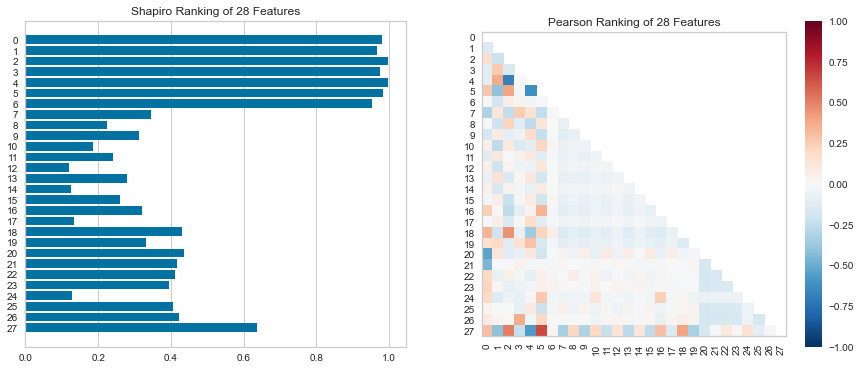

In [231]:
model_visuals(final_KNN,X_train,y_train,X_test,y_test,numerical,categorical,cols_j)

### Model Interpretation

### Results

## Conclusions

## Recommendations

## Future Work